In [1]:
# In[55]:
###############################################################################
##### Aplicando a decomposicao das series temporais
##### usando a palheta de cores viridis
############# decomposicao da serie temporal do PIB Mensal BR

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Configurar o estilo dos graficos e a paleta de cores
sns.set(style='whitegrid', palette='viridis')

# Carregar os dados do Excel
pib = pd.read_excel('pib_mensal.xlsx')

# Transformar a base de dados em um objeto de serie temporal (Selecione todos
# os comandos)
pib_ts = pd.Series(pib.iloc[:, 1].values, 
                   index=pd.date_range(start='2004-01-01',
                                       periods=len(pib), freq='ME'))

C:\Users\naime\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


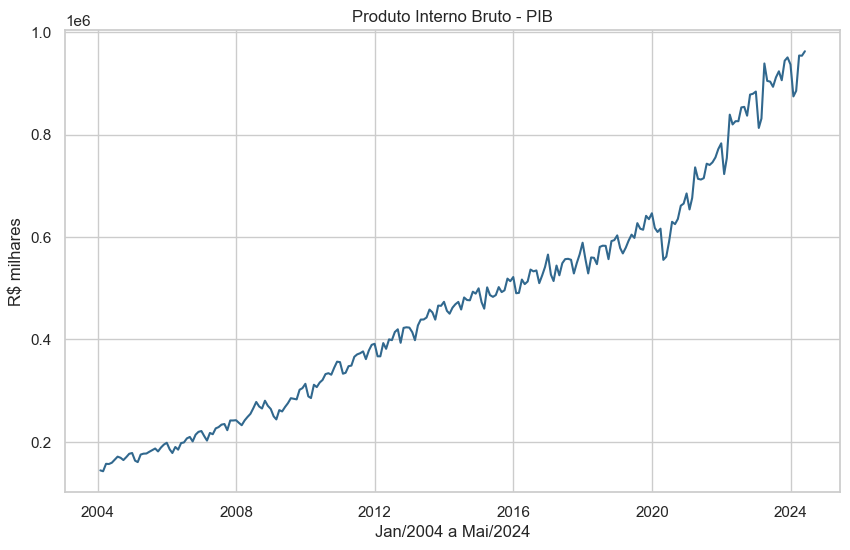

In [2]:
# In[56]: Fazer a plotagem da serie temporal (Selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(pib_ts, color=sns.color_palette("viridis", 2)[0])
plt.title('Produto Interno Bruto - PIB')
plt.xlabel('Jan/2004 a Mai/2024')
plt.ylabel('R$ milhares')
plt.show()

### Série com tendência,sazonalidade e variações cíclicas
• Muitas séries apresentam junto a uma tendência
variações cíclicas e sazonais;
• Estas variações aparecem devido a clima, fatores
econômicos, hora, etc;
• Se estas variações podem ser observadas, a sua
consideração pode ajudar a melhorar as previsões.
• São usados o método da decomposição:
• MULTIPLICATIVO
• ADITIVO


### Aditivo
Y = T+C+S+E
• Y - valor da série no instante t
• T - componente de tendência para o instante t
• C - componente cíclica para o instante t
• S - componente sazonal para o instante t
• E - componente aleatória para o instante t

### Multiplicativo
Y = T*C*S*E
• Y - valor da série no instante t
• T - componente de tendência para o instante t
• C - componente cíclica para o instante t
• S - componente sazonal para o instante t
• E - componente aleatória para o instante t

### Modelo Multiplicativo

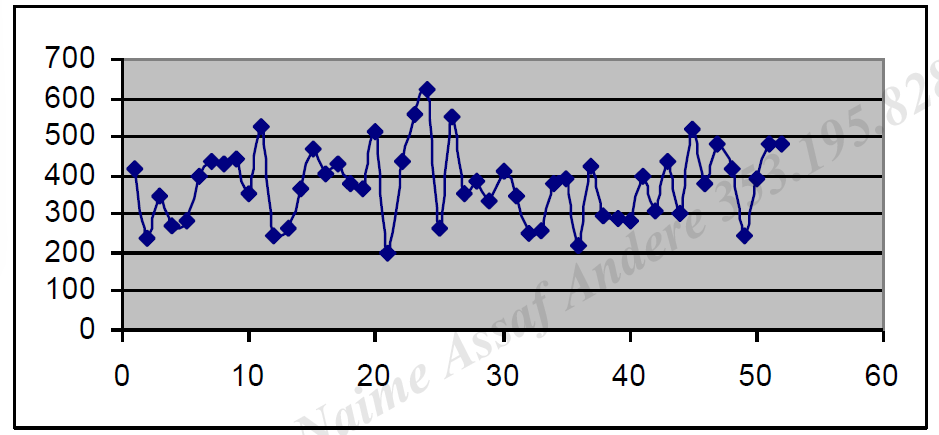

O modelo multiplicativo é normalmente aplicado a dados em
que o tamanho dos efeitos sazonais aumentam.

### Modelo Aditivo 
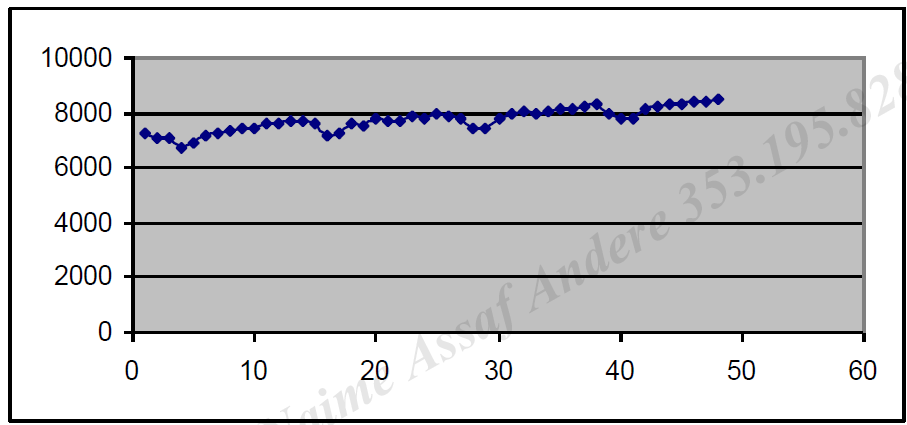

O modelo aditivo geralmente é considerado mais adequado para dados em que as flutuações sazonais permanecem aproximadamente do mesmo tamanho com o tempo.

In [3]:
# In[57]: Decompor o PIB pelo modelo aditivo
decomp_add = seasonal_decompose(pib_ts, model='additive', period=12)

# Decompor o PIB pelo modelo multiplicativo
decomp_mul = seasonal_decompose(pib_ts, model='multiplicative', period=12)

In [4]:
# In[58]: Funcao para plotar decomposicao (Selecionar todos os comandos)
def plot_decomposition(decomposition, title):
    colors = sns.color_palette("viridis", 4)
    
    plt.figure(figsize=(14, 10))
    plt.suptitle(title, fontsize=16)

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observado', color=colors[0])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendencia', color=colors[1])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Sazonalidade', color=colors[2])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(414)
    plt.plot(decomposition.resid, label='ResÃiduos', color=colors[3])
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

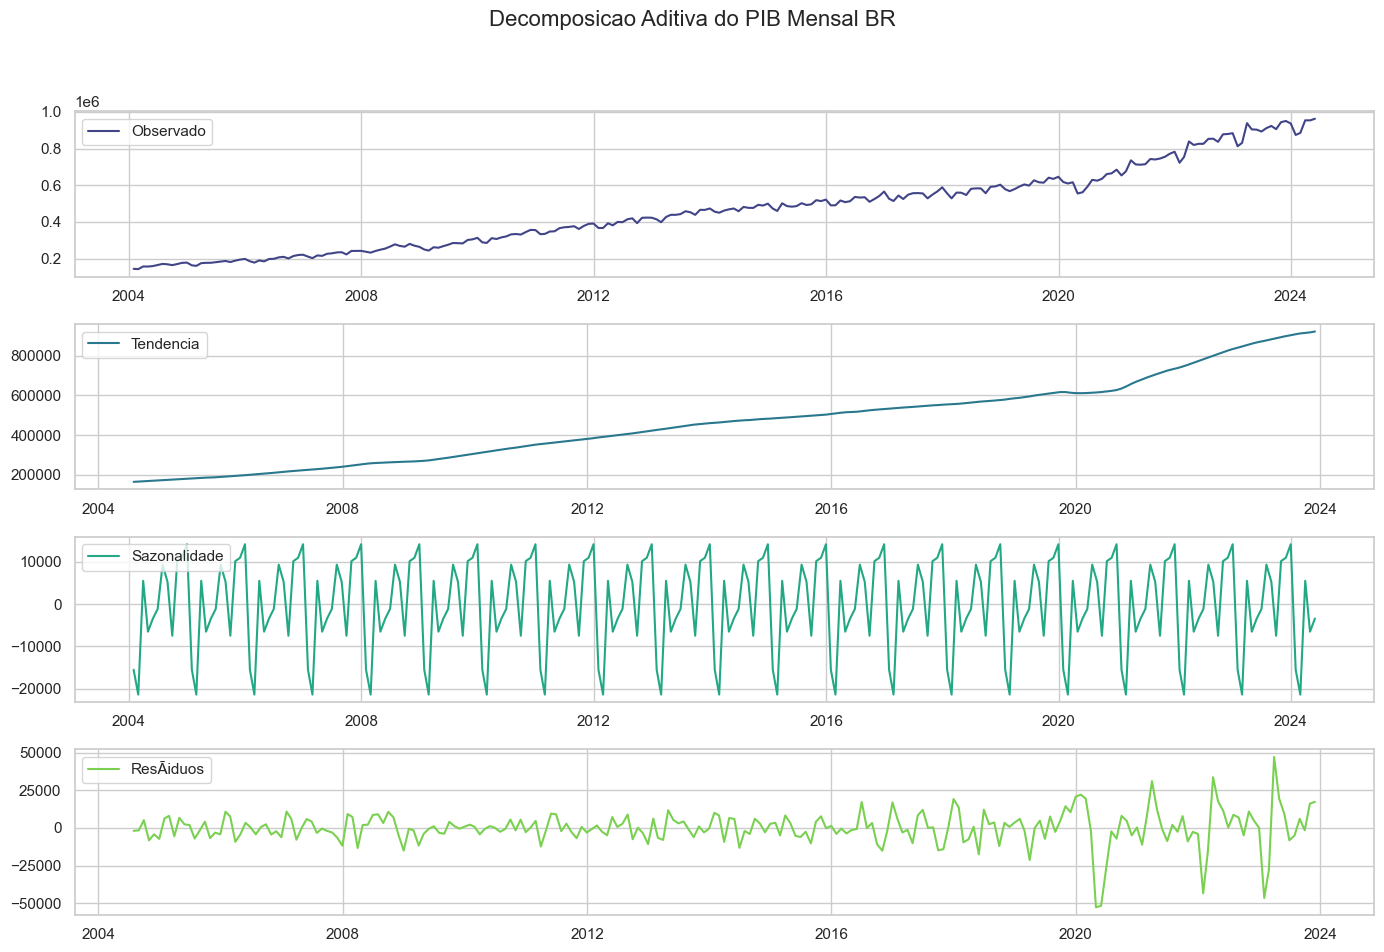

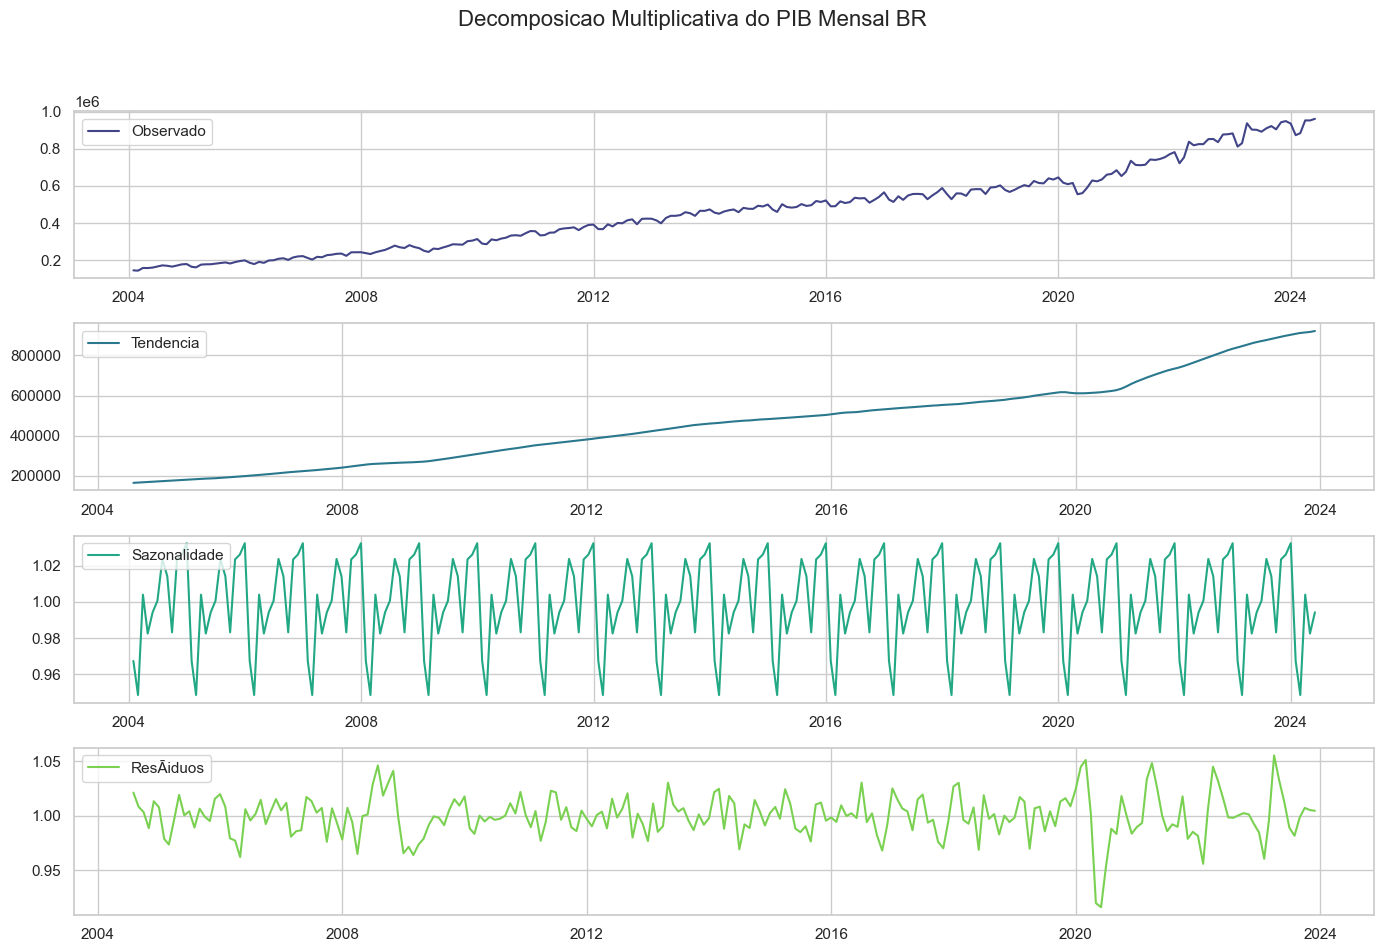

In [5]:
# In[59]: Plotar decomposicao aditiva
plot_decomposition(decomp_add, 'Decomposicao Aditiva do PIB Mensal BR')

# Plotar decomposicao multiplicativa
plot_decomposition(decomp_mul, 'Decomposicao Multiplicativa do PIB Mensal BR')


# Previsões com teste de qualidade
## Estatisticas de Acuracia das previsoes

Estatísticas de Erro das Previsões
• ME: Mean Error – É a média da diferença entre realizado
e o previsto.

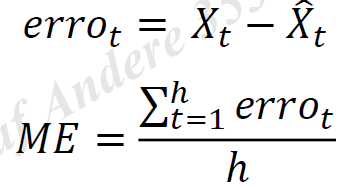

• MAE: Mean Absolute Error – É a média da diferença
absoluta entre realizado e previsto

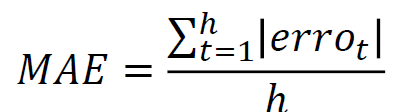

• RMSE: Root Mean Square Error – É o desvio padrão total
da amostra da diferença entre o previsto e o realizado.

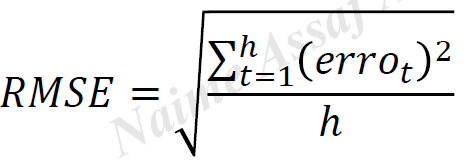

In [6]:
#Instalação da biblioteca scikit-learn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# In[60]:
###############################################################################
### Estatisticas de Acuracia das previsoes
###############################################################################



from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.metrics import accuracy_score
import numpy as np

# Exemplo
reais = np.array([1, 2, 3, 5, 6, 8, 9])
previstos = np.array([1, 3, 3, 4, 6, 7, 9])

# Calculo do Erro
erro = reais - previstos

# Calculo do Erro Medio
merror = sum(erro)/len(erro)
merror

# Calculo do Erro Absoluto Medio
mae = mean_absolute_error(reais, previstos)
mae

# Calculo da Raiz Quadrada do Erro Medio
rmse = mean_squared_error(reais, previstos, squared=False)
rmse

# Calculo do Erro Percentual Medio
erro_percentual = (reais - previstos)/reais
mpe = me = sum(erro_percentual)/len(erro)*100
mpe

# Calculo do Erro Absoluto Percentual Medio
mape = mean_absolute_percentage_error(reais,previstos)*100
mape

C:\Users\naime\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


11.785714285714285

In [8]:
# In[61]: Calculo do Coeficiente U de Theil
# Funcao para calculo do Coeficiente U de Theil (selecionar todos os comandos)

def division(measure, previousI):
  return measure / previousI

def power(measure):
  return np.power(measure, 2)

def summation(measure):
  return np.sum(measure)

def mean(N, measure):
  return (1/N) * measure

def sqrt(measure):
  return np.sqrt(measure)

def computeTheilU2(y_true, y_pred):
    N = len(y_true)
    
    subtractionNumerator = y_pred[1:] - y_true[1:]
    divisionNumerator = division(subtractionNumerator, y_true[:-1])
    powerNumerator = power(divisionNumerator)
    summationNumerator = summation(powerNumerator)
    meanNumerator = mean(N, summationNumerator)
    numerator = sqrt(meanNumerator)
    
    subtractionDenominator = y_true[1:] - y_true[:-1]
    powerDenominator = power(division(subtractionDenominator, y_true[:-1]))
    denominator = sqrt(mean(N, summation(powerDenominator)))
        
    theilU2 = numerator / denominator
    
    return theilU2

theil = computeTheilU2(reais,previstos)

theil

0.7822515361226225

Essas medidas carregam a grandeza unidade de medidas utilizada, (R$, milhares, porções, etc..)

• MPE: Mean Percentage Error – É a diferença percentual
do erro.

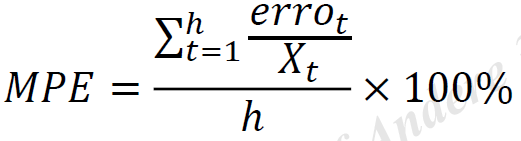

• MAPE: Mean Absolute Percentage Error – É a diferença
absoluta percentual do erro.

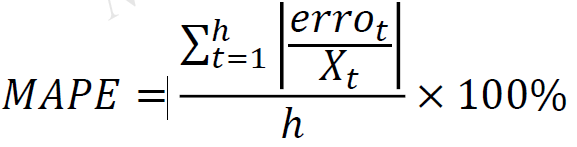

Essa medida é representada por peso, %.

In [9]:
# In[62]: Exibir as metricas de acuracia (Selecione todos os comandos)
print(" Indicadores de Acuracia")
print(f'ME - Mean Error: {merror:.2f}')
print(f'MAE - Mean Absolute Error: {mae:.2f}')
print(f'RMSE - Raiz Quadrada do Erro Medio: {rmse:.2f}')
print(f'MPE - Mean Percentage Error: {mpe:.2f}')
print(f'MAPE - Mean Absolute Percentage Error: {mape:.2f}')
print(f'THEIL_U - Theils Inequality Coefficient: {theil:.4f}')


 Indicadores de Acuracia
ME - Mean Error: 0.14
MAE - Mean Absolute Error: 0.43
RMSE - Raiz Quadrada do Erro Medio: 0.65
MPE - Mean Percentage Error: -2.50
MAPE - Mean Absolute Percentage Error: 11.79
THEIL_U - Theils Inequality Coefficient: 0.7823


# Metodos SIMPLES de Previsao de Series Temporais

In [10]:
serie = np.array([3, 5, 9, 20, 12, 17, 22, 23, 51, 41, 56, 75, 60, 75, 88])

### Metodo NAIVE 

O método **Naive**, ou **ingênuo**, é uma abordagem simples e direta utilizada em estatísticas e aprendizado de máquina. É um termo comumente associado a métodos que fazem suposições simplificadas ou pouco sofisticadas para resolver problemas complexos. Existem diferentes contextos em que o termo **"naive"** é usado, sendo os mais comuns:

### 1. **Naive Bayes Classifier** (ou Classificador Ingênuo de Bayes):
É um dos algoritmos de classificação mais simples e populares. Ele é chamado de **"ingênuo"** porque assume que todas as variáveis preditoras são **estatisticamente independentes entre si**, o que raramente é verdadeiro na prática. Mesmo com essa suposição irrealista, o Naive Bayes funciona surpreendentemente bem em muitos problemas de classificação. Ele utiliza o **Teorema de Bayes** para calcular as probabilidades de uma classe com base nos valores das variáveis de entrada.

### Fórmula do Naive Bayes:
A probabilidade de um determinado resultado $C_k$ dado um conjunto de atributos $X_1, X_2, \ldots, X_n$ é:


$P(C_k \mid X_1, X_2, \ldots, X_n) \propto P(C_k) \prod_{i=1}^{n} P(X_i \mid C_k)$


### 2. **Naive Forecasting** (ou Previsão Ingênua):
No campo de séries temporais, o **Naive Forecasting** refere-se a uma técnica simples de previsão, onde a previsão de uma série de dados é feita com base no último valor observado. Por exemplo, se você deseja prever o valor de uma série temporal para o próximo mês, você simplesmente assume que ele será igual ao valor observado no último mês.

### 3. **Naive Approach em Outros Contextos**:
Naive é frequentemente usado para se referir a métodos que ignoram possíveis interações complexas, relações causais, ou efeitos ocultos em dados. No entanto, essa simplicidade pode ser útil em situações onde não há conhecimento prévio sobre os dados ou onde métodos complexos não oferecem vantagens claras.

**Resumo:** O termo **naive** é usado para descrever métodos que fazem **assunções simplificadas ou ingênuas**. Em muitos casos, essas técnicas são úteis por sua simplicidade, eficiência e robustez, mesmo sem modelar relações complexas entre as variáveis.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Funcao para realizar previsao naive e calcular intervalos de confianca 
# ajustados

def naive_forecast(time_series, h=3, confidence_level=0.95):
    # A ultima observacao da serie
    last_observation = time_series[-1]
    
    # Previsoes naive para h passos a  frente
    forecasts = np.array([last_observation] * h)
    
    # Calculando os erros de previsao
    errors = time_series[1:] - time_series[:-1] 
    erro2=errors*errors
    std_error =np.sqrt(erro2.mean())  # Desvio dos erros
    
    # Valor cri­tico da distribuicao normal para o ni­vel de confianca desejado
    z_value = stats.norm.ppf((1 + confidence_level) / 2)
    
    # Calculando os intervalos de confianca com ajuste para h passos a  frente
    confidence_intervals = [
        (forecast - z_value * std_error * np.sqrt(step+1), 
         forecast + z_value * std_error * np.sqrt(step+1))
        for step, forecast in enumerate(forecasts)
    ]
    
    # Criando um DataFrame para armazenar previsoes e intervalos de confianca
    forecast_df = pd.DataFrame({
        "Previsao": forecasts,
        "IC Inferior": [ci[0] for ci in confidence_intervals],
        "IC Superior": [ci[1] for ci in confidence_intervals]
    }, index=[f'T+{i+1}' for i in range(h)])
    
    return forecast_df, confidence_intervals

In [12]:
# In[65]: Funcao para plotar a serie temporal com previsoes e intervalos de confianca 
def plot_naive_forecast(time_series, forecast_df):
    n = len(time_series)
    h = len(forecast_df)
    
    plt.figure(figsize=(10, 6))
    
    # Plotando os valores reais da serie temporal
    plt.plot(range(n), time_series, label='Serie Temporal', color='blue')
    
    # Plotando os valores previstos
    plt.plot(range(n-1, n+h), np.concatenate(([time_series[-1]], 
                                              forecast_df['Previsao'])), 
             label='Previsao (Naive)', linestyle='--', marker='o', color='orange')

    # Plotando os limites inferior e superior dos intervalos de confianca
    plt.plot(range(n, n+h), forecast_df['IC Inferior'], 
             label='IC Inferior (95%)', linestyle='--', color='red')
    plt.plot(range(n, n+h), forecast_df['IC Superior'],
             label='IC Superior (95%)', linestyle='--', color='green')

    # Adicionando ro­tulos e legendas
    plt.title('Previsao Naive com Intervalos de Confianca (95%)')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    
    # Exibindo o grafico
    plt.show()

     Previsao  IC Inferior  IC Superior
T+1        88    62.633795   113.366205
T+2        88    52.126769   123.873231
T+3        88    44.064444   131.935556


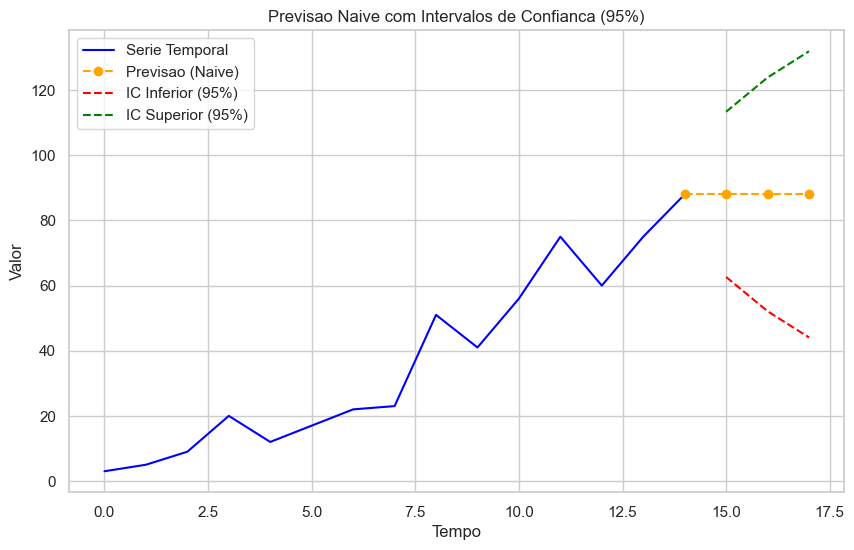

In [13]:
# In[66]: Aplicando a previsao naive com intervalos de confianca ajustados
naiveforecast_df, confidence_intervals = naive_forecast(serie, h=3)

# Mostrando o DataFrame com previsoes
print(naiveforecast_df)

# Plotando os resultados com previsoes e intervalos de confianca como linhas
plot_naive_forecast(serie, naiveforecast_df)


# Metodo de previsao pela MEDIA 

O **método de previsão pela média** é uma técnica simples de previsão de séries temporais. A ideia principal é prever o valor futuro como a **média aritmética de todos os valores passados**. Esse método assume que os dados históricos não possuem tendências ou sazonalidades e que o valor médio passado é a melhor estimativa para previsões futuras.

### Como Funciona

A fórmula para calcular a previsão pela média é a seguinte:

$\hat{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i$


Onde:
- $\hat{Y}$ é o valor previsto.
- $Y_i$ são os valores históricos da série temporal.
- $n$ é o número de observações históricas.

### Exemplo Prático

Vamos supor que você tenha uma série temporal com os seguintes valores observados:

| Período | Valor (Y) |
|---------|------------|
| 1       | 10         |
| 2       | 12         |
| 3       | 15         |
| 4       | 13         |
| 5       | 11         |

Para prever o valor do próximo período usando o método da média:

$\hat{Y} = \frac{10 + 12 + 15 + 13 + 11}{5} = \frac{61}{5} = 12.2$

Portanto, a previsão para o próximo período é **12.2**.

### Características do Método de Previsão pela Média

- **Simplicidade:** É um método fácil de implementar e entender.
- **Estabilidade:** Funciona bem para séries temporais onde não há uma tendência ou padrão de sazonalidade marcante.
- **Incapacidade de Capturar Padrões:** Ele não leva em consideração as variações ao longo do tempo, tendências ou sazonalidades. Como resultado, é mais adequado para séries temporais estacionárias (ou seja, onde a média e a variância são constantes ao longo do tempo).

### Uso Típico

O método de previsão pela média é mais apropriado quando:

- A série temporal apresenta um comportamento estável, sem tendências ou sazonalidades.
- Você deseja obter uma estimativa básica do valor futuro sem precisar de modelagens complexas.
- Como ponto de comparação para métodos mais sofisticados.

### Comparação com Outros Métodos

- **Método Ingênuo (Naive Forecasting):** No método ingênuo, a previsão para o próximo período é igual ao valor mais recente observado, enquanto no método da média, a previsão é a média de todos os valores anteriores.
- **Média Móvel:** Uma versão mais sofisticada do método de previsão pela média é a **Média Móvel** (Moving Average), que usa apenas uma janela de valores mais recentes para calcular a média, capturando melhor possíveis variações temporais.

### Resumo

O método de previsão pela média é um ponto de partida simples para previsões de séries temporais, especialmente quando se deseja criar uma linha de base ou quando os dados não apresentam padrões claros.

In [14]:
# Funcao para realizar previsao pela media e calcular intervalos de confianca 

def forecast_with_mean(time_series, steps_ahead, confidence=0.95):
    # Calcular a media da serie
    mean_series = np.mean(time_series)
    
    # Calcular os erros (resi­duos) da previsao pela media
    errors = time_series - mean_series
    
    # Calcular o desvio padrao dos erros
    std_errors = np.std(errors, ddof=1)
    
    # Prever com base na media
    forecast = [mean_series] * steps_ahead

    # Calcular intervalo de confianca usando o desvio padrao dos erros
    n = len(time_series)
    alpha = 1 - confidence
    t_value = stats.t.ppf(1 - alpha/2, df=n-1)  
    margin_of_error = t_value * std_errors*np.sqrt(1+1/len(time_series))
    
    # Inferior e superior
    lower_bound = [mean_series - margin_of_error] * steps_ahead
    upper_bound = [mean_series + margin_of_error] * steps_ahead

    return forecast, lower_bound, upper_bound

In [15]:
# In[68]: Funcao para plotar a serie original e a previsao
def plot_forecast_with_mean(time_series, forecast, lower_bound,
                                            upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original", 
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao", marker='o', 
             linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray',
                     alpha=0.05, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao com Intervalo de Confianca pela media")
    plt.show()

In [16]:
# In[69]: Definir numero de passos a  frente
h = 3

# Gerar previsao e intervalos de confianca
forecast_mean, lower_bound, upper_bound = forecast_with_mean(serie, h)

forecast_mean

[37.13333333333333, 37.13333333333333, 37.13333333333333]

In [17]:
# In[70]: Exibir resultados
print("Previsao", forecast_mean)
print("Limite inferior do intervalo de confianca:", lower_bound)
print("Limite superior do intervalo de confianca:", upper_bound)


Previsao [37.13333333333333, 37.13333333333333, 37.13333333333333]
Limite inferior do intervalo de confianca: [-25.77038113884933, -25.77038113884933, -25.77038113884933]
Limite superior do intervalo de confianca: [100.037047805516, 100.037047805516, 100.037047805516]


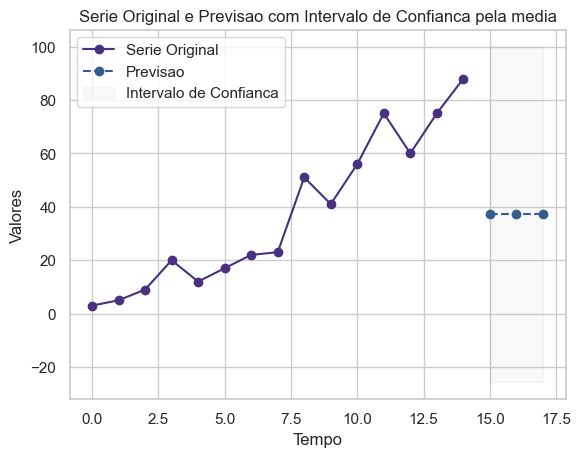

In [18]:
# In[71]: Chamar a funcao de plotagem
plot_forecast_with_mean(serie, forecast_mean, lower_bound, upper_bound, h)

In [19]:
# In[70]: Exibir resultados
print("Previsao", forecast_mean)
print("Limite inferior do intervalo de confianca:", lower_bound)
print("Limite superior do intervalo de confianca:", upper_bound)

Previsao [37.13333333333333, 37.13333333333333, 37.13333333333333]
Limite inferior do intervalo de confianca: [-25.77038113884933, -25.77038113884933, -25.77038113884933]
Limite superior do intervalo de confianca: [100.037047805516, 100.037047805516, 100.037047805516]


# Metodo de previsao com DRIFT

O **Método de Previsão com Drift** é uma técnica simples usada em séries temporais para fazer previsões assumindo que há uma **tendência linear** nos dados. Ele é semelhante ao método de previsão ingênuo (ou naive), mas leva em conta a variação ou inclinação (drift) entre o primeiro e o último ponto da série, projetando essa inclinação para o futuro.

### Como Funciona o Método de Drift

O método de previsão com drift pressupõe que os valores aumentam ou diminuem ao longo do tempo de forma linear. A previsão é baseada na inclinação calculada entre o primeiro e o último valor da série, adicionando essa inclinação ao valor mais recente.

### Fórmula do Método de Drift

A fórmula para previsão no Método de Drift é dada por:

\[
\hat{Y}_{t+h} = Y_t + \frac{Y_t - Y_1}{t - 1} \times h
\]

Onde:
- $\hat{Y}_{t+h}$ é o valor previsto para $h$ períodos à frente.
- $Y_t$ é o valor observado no último período.
- $Y_1$ é o valor observado no primeiro período.
- $t$ é o número de períodos na série histórica.
- $h$ é o número de períodos à frente para os quais se deseja fazer a previsão.

### Exemplo Prático

Vamos considerar uma série temporal com os seguintes valores:

| Período | Valor (Y) |
|---------|------------|
| 1       | 100        |
| 2       | 102        |
| 3       | 105        |
| 4       | 108        |
| 5       | 110        |

Suponha que queremos prever o valor para **2 períodos à frente** (ou seja, $h = 2$).

- $Y_t = 110$ (valor no último período).
- $Y_1 = 100$ (valor no primeiro período).
- $t = 5$ (número de períodos observados).

A inclinação ($\text{drift}$) entre o primeiro e o último valor é calculada como:

$\text{Drift} = \frac{Y_t - Y_1}{t - 1} = \frac{110 - 100}{5 - 1} = \frac{10}{4} = 2.5$

Agora, para prever $h = 2$ períodos à frente:

$\hat{Y}_{t+2} = Y_t + \text{Drift} \times h = 110 + 2.5 \times 2 = 115$

Portanto, a previsão para 2 períodos à frente é **115**.

### Características do Método de Drift

- **Simples de implementar:** Como outros métodos ingênuos, o método de drift é fácil de calcular.
- **Considera uma tendência linear:** Diferentemente do método ingênuo (naive), o método de drift leva em consideração a mudança constante ao longo do tempo.
- **Adequado para séries temporais com tendências:** Funciona bem para séries temporais que mostram um comportamento de tendência linear.

### Uso Típico

- Quando se deseja modelar uma série temporal com uma tendência **quase linear** ao longo do tempo.
- Como um ponto de partida para comparações com outros modelos de previsão mais complexos.
- Em dados financeiros (preços de ações, índices), onde uma tendência linear simples pode ser observada por curtos períodos.

### Comparação com Outros Métodos

- **Método Naive (Ingênuo):** Previsões baseadas apenas no último valor observado, sem levar em conta tendências.
- **Média Móvel e Suavização Exponencial:** Métodos mais avançados que tentam suavizar variações e capturar tendências de forma mais adaptativa.
- **Método de Regressão Linear:** Para séries temporais com tendências lineares mais complexas, a regressão linear pode ser uma alternativa melhor.

### Resumo

O método de previsão com drift é uma técnica simples, baseada na ideia de projetar uma tendência linear observada no passado para o futuro. Ele é ideal para séries temporais onde há uma variação constante (drift) ao longo do tempo. É uma boa escolha para cenários de curto prazo onde uma tendência linear pode ser esperada, mas não há necessidade de um modelo sofisticado.

In [20]:
# Funcao para calcular a previsao pelo modelo de Drift
def drift_forecast(time_series, steps_ahead, confidence=0.95):
    n = len(time_series)
    
    # Previsao pelo modelo de drift
    drift = (time_series[-1] - time_series[0]) / (n - 1)
    forecast = [time_series[-1] + (i + 1) * drift for i in range(steps_ahead)]
    
    # Calculo dos erros 
    predicted_values = []
    for i in range(1, n):
        predicted_values.append(time_series[i-1] + drift)
    
    # Calcular os erros como a diferenca entre os valores reais e os previstos
    errors = time_series[1:] - np.array(predicted_values)
    erro2=errors*errors
   
    # Calcular o desvio dos erros
    std_errors = np.sqrt(erro2.mean())
 
    # variavel auxiliar para o intervalo de confianca
    calc = len(errors)
  
    # Calcular intervalo de confianca usando o desvio padrao dos erros
    z_value = stats.norm.ppf((1 + confidence) / 2)
   
    # Limites inferior e superior
    lower_bound = [forecast[i] -
                   z_value * std_errors * np.sqrt((i+1)*(1+(i+1)/(calc -1)))
                   for i in range(steps_ahead)]
    upper_bound = [forecast[i] +
                   z_value * std_errors * np.sqrt((i+1)*(1+(i+1)/(calc -1))) 
                   for i in range(steps_ahead)]
        
    return forecast, lower_bound, upper_bound

In [21]:
# In[73]: Funcao para plotar a serie original e a previsao pelo modelo de Drift
def plot_forecast_with_drift(time_series, forecast, lower_bound,
                                            upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original",
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao (Drift)", marker='o', 
             linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray', 
                     alpha=0.05, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao pelo Modelo de Drift com Intervalo de Confianca")
    plt.show()

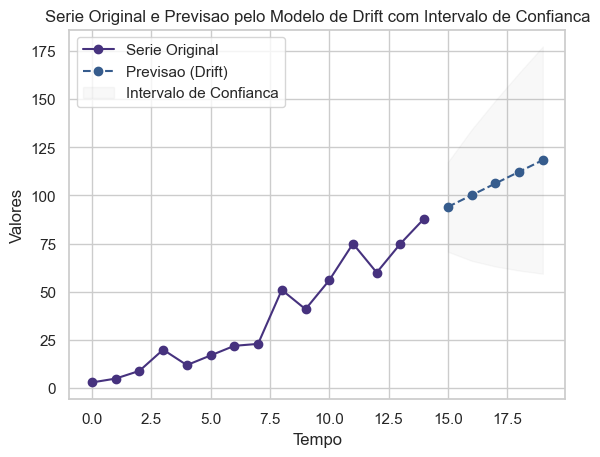

In [22]:
# In[74]: Definir numero de passos a  frente
h = 5

# Gerar previsao e intervalos de confianca pelo modelo de Drift
forecast_drift, lower_bound, upper_bound = drift_forecast(serie, h)

forecast_drift
lower_bound
upper_bound

# Chamar a funcao de plotagem
plot_forecast_with_drift(serie, forecast_drift, lower_bound, upper_bound, h)


# Metodo de previsao com NAIVE SAZONAL

O **Método de Previsão Ingênuo Sazonal** (ou **Naive Sazonal**) é uma técnica usada para prever séries temporais que apresentam uma **sazonalidade**, ou seja, um padrão repetitivo em intervalos regulares (por exemplo, diário, semanal, mensal, anual, etc.). Esse método baseia-se na suposição de que o valor a ser previsto para um determinado período será igual ao valor observado no mesmo período da última estação (ou ciclo) anterior.

### Como Funciona

No **Método Ingênuo Sazonal**, a previsão para o próximo valor é simplesmente o valor observado no mesmo período do ciclo anterior. Por exemplo, se você está fazendo uma previsão mensal, a previsão para janeiro de 2024 será o valor observado em janeiro de 2023.

### Fórmula do Método Ingênuo Sazonal

A previsão sazonal ingênua para um período futuro $t + h$ é dada por:

$\hat{Y}_{t+h} = Y_{t+h-km}$

Onde:
- $\hat{Y}_{t+h}$ é o valor previsto para o período $t+h$.
- $Y_{t+h-km}$ é o valor observado no período equivalente da última estação.
- $k$ é o número de ciclos completos anteriores.
- $m$ é a duração da estação (ou ciclo) da sazonalidade.

### Exemplo Prático

Vamos supor que você tem uma série temporal mensal com vendas de um produto ao longo de dois anos (24 meses) e quer prever o valor para janeiro do terceiro ano. Os valores de vendas são mostrados na tabela a seguir:

| Mês (2022) | Vendas (Y) | Mês (2023) | Vendas (Y) |
|------------|-------------|------------|-------------|
| Janeiro    | 100         | Janeiro    | 120         |
| Fevereiro  | 110         | Fevereiro  | 130         |
| Março      | 105         | Março      | 115         |
| ...        | ...         | ...        | ...         |
| Dezembro   | 140         | Dezembro   | 150         |

Para prever as vendas em **janeiro de 2024**, usamos o valor observado em **janeiro de 2023** (120), pois é o valor do mesmo mês (ou período) da estação anterior.

Portanto, a previsão para janeiro de 2024 será **120**.

### Características do Método Ingênuo Sazonal

- **Simples de implementar:** Assim como outros métodos ingênuos, é muito fácil de entender e implementar.
- **Captura padrões sazonais simples:** Funciona bem para séries temporais que apresentam um padrão sazonal claro e consistente.
- **Não considera tendências:** O método ingênuo sazonal não leva em conta tendências lineares ou mudanças na média ao longo do tempo. Apenas repete os valores sazonais passados.

### Uso Típico

O Método Ingênuo Sazonal é mais adequado para séries temporais que possuem um padrão sazonal claro e repetitivo, como:

- **Vendas sazonais de produtos:** Produtos cujas vendas aumentam em certos meses do ano (Natal, Black Friday, verão, etc.).
- **Dados meteorológicos:** Temperaturas médias, precipitação em períodos específicos do ano.
- **Tráfego de sites:** Padrões sazonais de visitas (diárias, semanais ou mensais).

### Comparação com Outros Métodos

- **Método Ingênuo Simples:** O valor previsto é igual ao último valor observado, ignorando completamente qualquer padrão sazonal.
- **Método de Drift:** Considera uma tendência linear ao longo do tempo.
- **Métodos Mais Sofisticados (Holt-Winters, SARIMA, etc.):** São capazes de modelar padrões sazonais, tendências e variabilidade de maneira mais precisa e complexa.

### Resumo

O **Método Ingênuo Sazonal** é uma técnica de previsão fácil de implementar, projetada para lidar com séries temporais que apresentam padrões sazonais repetitivos. A previsão é baseada em repetir o valor observado no mesmo período do ciclo anterior. Esse método é ideal para séries temporais com sazonalidade estável e previsível, sem grandes variações ou tendências a longo prazo.

In [23]:
# Funcao para rodar o modelo Naive Sazonal com intervalos de confianca
def seasonal_naive_forecast(time_series, season_length, steps_ahead, confidence=0.95):
    """
    time_series: Série temporal
    season_length: Período sazonal (ex: 12 meses para sazonalidade mensal)
    steps_ahead: O número de períodos à frente para previsão
    confidence: Nível de confiança (95% por padrão)
    """
    # Prever o valor com base na sazonalidade anterior
    forecast = [time_series.iloc[-season_length + i] for i in range(steps_ahead)]
    
    # Previsão dos valores dentro da série histórica para obter resíduos
    predicted_values = [time_series.iloc[i - season_length] for i in range(season_length, len(time_series))]
  
    # Calcular os erros residuais
    residuals = time_series.iloc[season_length:] - np.array(predicted_values)
    
    # Calcular o quadrado dos erros (resíduos)
    errors2 = residuals ** 2
    
    # Calcular o desvio padrão dos erros
    std_residuals = np.sqrt(errors2.mean())
 
    # Calcular o valor crítico z para o intervalo de confiança
    z_value = stats.norm.ppf((1 + confidence) / 2)
    
    # Calcular a margem de erro
    margin_of_error = z_value * std_residuals
    
    # Definir limites inferiores e superiores dos intervalos de confiança
    lower_bound = [forecast[i] - margin_of_error * np.sqrt((i // season_length) + 1) for i in range(steps_ahead)]
    upper_bound = [forecast[i] + margin_of_error * np.sqrt((i // season_length) + 1) for i in range(steps_ahead)]
    
    return forecast, lower_bound, upper_bound

In [24]:
# In[76]: Funcao para plotar a serie original, previsao e intervalos de confianca
def plot_seasonal_naive_forecast(time_series, forecast, lower_bound,
                                 upper_bound, steps_ahead):
    # Plotar a serie original
    plt.plot(range(len(time_series)), time_series, label="Serie Original",
             marker='o')
    
    # Criar eixo de tempo para previsao
    forecast_range = range(len(time_series), len(time_series) + steps_ahead)
    
    # Plotar a previsao
    plt.plot(forecast_range, forecast, label="Previsao (Naive Sazonal)", 
             marker='o', linestyle='--')
    
    # Plotar intervalo de confianca
    plt.fill_between(forecast_range, lower_bound, upper_bound, color='gray',
                     alpha=0.2, label='Intervalo de Confianca')
    
    # Detalhes do grafico
    plt.xlabel("Tempo")
    plt.ylabel("Valores")
    plt.legend()
    plt.title("Serie Original e Previsao pelo Modelo Naive Sazonal com Intervalo de Confianca")
    plt.show()

In [25]:
# In[77]: Importando a base de dados
# pip install --upgrade openpyxl

airp = pd.read_excel("airpassengers.xlsx")

# Lendo a base de dados
print(airp.head())

         mes  passengers
0 2007-01-01         112
1 2007-02-01         118
2 2007-03-01         132
3 2007-04-01         129
4 2007-05-01         121


In [26]:
# In[78]: Definindo a serie temporal com frequencia mensal
airpas = pd.Series(airp.iloc[:, 1].values, 
                    index=pd.date_range(start='2007-01-01', periods=len(airp), 
                                        freq='M'))

C:\Users\naime\AppData\Local\Temp\ipykernel_42432\1978141322.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='2007-01-01', periods=len(airp),


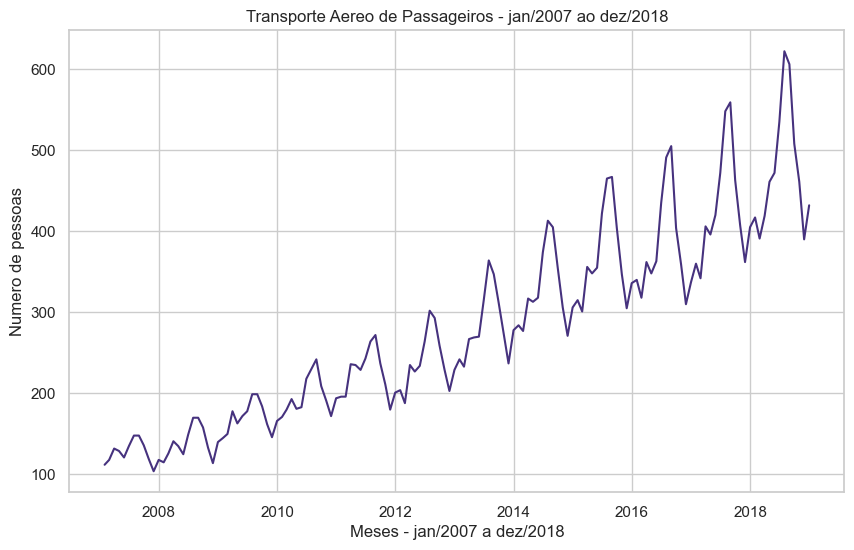

In [27]:
# In[79]: Plotando o grafico
plt.figure(figsize=(10, 6))
plt.plot(airpas)
plt.title("Transporte Aereo de Passageiros - jan/2007 ao dez/2018")
plt.xlabel("Meses - jan/2007 a dez/2018")
plt.ylabel("Numero de pessoas")
plt.grid(True)
plt.show()

In [28]:
# In[80]: Definir os parametros de sazonalidade e numero de passos a  frente
season_length = 12  # Por exemplo, 12 meses para sazonalidade anual
steps_ahead = 12  # Prevendo os proximos 12 peri­odos (um ano a  frente - h)


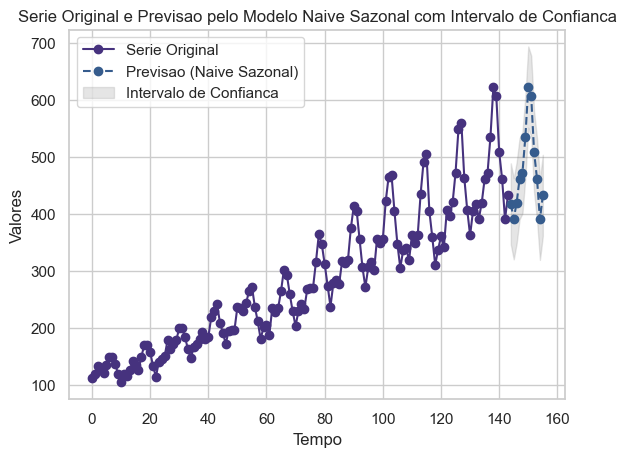

In [29]:
# In[81]: Gerar previsao e intervalos de confianca pelo modelo Naive Sazonal
forecast, lower_bound, upper_bound = seasonal_naive_forecast(airpas, 
                                                season_length, steps_ahead)

forecast
lower_bound
upper_bound

# Chamar a funcao de plotagem
plot_seasonal_naive_forecast(airpas, forecast, lower_bound, upper_bound, 
                             steps_ahead)


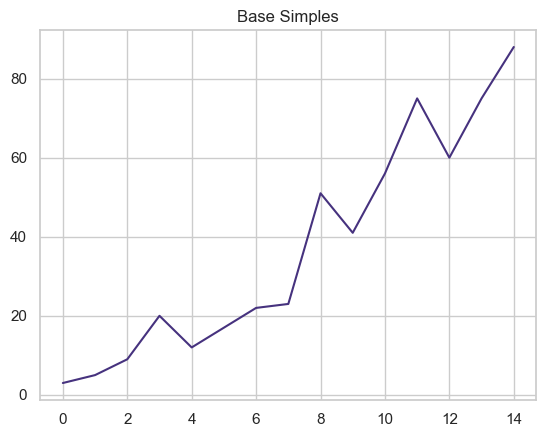

In [30]:
# In[82]:
###############################################################################
### Modelos de SUAVIZACAO EXPONENCIAL - Simples
###############################################################################

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW

# Base simples
base = pd.Series([3, 5, 9, 20, 12, 17, 22, 23, 51, 41, 56, 75, 60, 75, 88])

# Visualização da base de dados
plt.plot(base)
plt.title("Base Simples")
plt.show()


# Suavização Exponencial Simples (SES) - Modelagem simples sem tendência/sazonalidade

A **Suavização Exponencial Simples (SES)** é um método de previsão usado para séries temporais que não apresentam tendência nem sazonalidade. Essa técnica atribui pesos decrescentes aos valores passados, o que significa que os valores mais recentes têm mais influência na previsão do que os valores mais antigos.

### Como Funciona

O SES utiliza uma fórmula simples para calcular a previsão, onde o valor estimado para o próximo período é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais antigos.

### Fórmula do SES

A fórmula para calcular a previsão utilizando suavização exponencial simples é a seguinte:

$\hat{Y}_{t+1} = \alpha Y_t + (1 - \alpha) \hat{Y}_t$

Onde:
- $\hat{Y}_{t+1}$ é a previsão para o próximo período.
- $Y_t$ é o valor observado no período atual.
- $\hat{Y}_t$ é a previsão do período atual (ou o último valor estimado).
- $\alpha$ é o parâmetro de suavização, um valor entre 0 e 1 que controla o nível de suavização. Um valor próximo de 1 dá mais peso aos dados mais recentes, enquanto um valor próximo de 0 dá mais peso aos dados antigos.

### Inicialização

A inicialização do método SES é crucial, especialmente para o primeiro período de previsão. O valor inicial pode ser definido como o primeiro valor observado da série:

$\hat{Y}_1 = Y_1$

### Exemplo Prático

Suponha que você tenha os seguintes valores observados de vendas ao longo de 5 meses:

| Mês | Vendas (Y) |
|-----|------------|
| 1   | 100        |
| 2   | 120        |
| 3   | 110        |
| 4   | 130        |
| 5   | 140        |

Vamos calcular a previsão para o **mês 6**, assumindo um valor de $\alpha = 0.3$.

1. **Inicialização:**
   - $\hat{Y}_1 = Y_1 = 100$

2. **Cálculo das Previsões:**
   - Para o mês 2:
     $\hat{Y}_2 = \alpha Y_1 + (1 - \alpha) \hat{Y}_1 = 0.3 \times 100 + 0.7 \times 100 = 100$

   - Para o mês 3:
     $\hat{Y}_3 = \alpha Y_2 + (1 - \alpha) \hat{Y}_2 = 0.3 \times 120 + 0.7 \times 100 = 106$

   - Para o mês 4:
     $hat{Y}_4 = \alpha Y_3 + (1 - \alpha) \hat{Y}_3 = 0.3 \times 110 + 0.7 \times 106 = 105.8$
     
   - Para o mês 5:
     $\hat{Y}_5 = \alpha Y_4 + (1 - \alpha) \hat{Y}_4 = 0.3 \times 130 + 0.7 \times 105.8 = 112.06$

3. **Previsão para o mês 6:**
   - Usando $Y_5 = 140$:
     $\hat{Y}_6 = \alpha Y_5 + (1 - \alpha) \hat{Y}_5 = 0.3 \times 140 + 0.7 \times 112.06 = 118.44$

Portanto, a previsão para o mês 6 é **118.44**.

### Características da Suavização Exponencial Simples

- **Simplicidade:** O SES é fácil de entender e implementar, com uma fórmula simples.
- **Flexibilidade:** O valor de $\alpha$ pode ser ajustado para controlar a quantidade de suavização desejada.
- **Reatividade:** O método responde rapidamente a alterações nos dados, pois dá mais peso às observações mais recentes.
- **Limitações:** O SES não captura tendências ou sazonalidades, tornando-se inadequado para séries temporais com essas características.

### Uso Típico

A Suavização Exponencial Simples é frequentemente utilizada em cenários como:

- Previsão de vendas e demanda em ambientes estáveis.
- Previsões financeiras onde não se espera uma variação significativa ao longo do tempo.
- Análise de dados em setores como varejo, onde os dados são relativamente constantes.

### Comparação com Outros Métodos

- **Método Ingênuo:** O método ingênuo prevê o próximo valor como igual ao último valor observado, enquanto o SES considera todos os valores passados.
- **Métodos de Suavização Exponencial Aditiva e Multiplicativa:** Esses métodos são mais avançados e podem lidar com séries temporais com tendência e sazonalidade.

### Resumo

A **Suavização Exponencial Simples** é uma técnica eficaz para previsão de séries temporais estáveis, onde não há tendências ou sazonalidades. É simples de implementar e permite ajustar o grau de suavização conforme necessário. Contudo, é importante considerar as limitações do SES ao aplicá-lo em dados que não atendem aos requisitos de estabilidade.

In [31]:
# Criando o modelo SES
ses_model = SimpleExpSmoothing(base).fit()
print(ses_model.summary())

ses_forecast = ses_model.forecast(3)

# Visualização dos valores previstos
print("Previsões (SES):")
print(ses_forecast)

# Valores ajustados

print("Valores Ajustados (SES):")
print(ses_model.fittedvalues)

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   None   No. Observations:                   15
Model:             SimpleExpSmoothing   SSE                           2266.445
Optimized:                       True   AIC                             79.269
Trend:                           None   BIC                             80.685
Seasonal:                        None   AICC                            83.269
Seasonal Periods:                None   Date:                 Tue, 05 Nov 2024
Box-Cox:                        False   Time:                         20:53:24
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8439153                alpha                 True
initial_level              3.0000000                

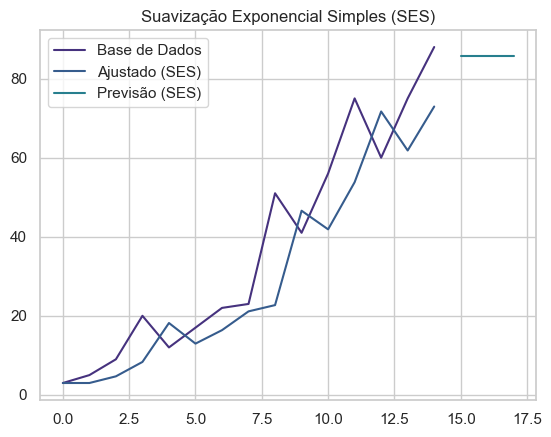

In [32]:
# In[84]: Visualização dos dados e previsões com intervalos de confiança
plt.plot(base, label="Base de Dados")
plt.plot(ses_model.fittedvalues, label="Ajustado (SES)")
plt.plot(np.arange(len(base), len(base) + 3), ses_forecast, label="Previsão (SES)")
plt.title("Suavização Exponencial Simples (SES)")
plt.legend()
plt.show()

# Modelo de Holt com Tendência

In [33]:
# Modelo Holt
holt_model = Holt(base).fit()
print(holt_model.summary())

holt_forecast = holt_model.forecast(3)

# Visualizando os valores previstos
print("Previsão com Holt: ")
print(holt_forecast)

                              Holt Model Results                              
Dep. Variable:                   None   No. Observations:                   15
Model:                           Holt   SSE                           1344.774
Optimized:                       True   AIC                             75.439
Trend:                       Additive   BIC                             78.271
Seasonal:                        None   AICC                            85.939
Seasonal Periods:                None   Date:                 Tue, 05 Nov 2024
Box-Cox:                        False   Time:                         20:53:24
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3854484                alpha                 True
smoothing_trend            0.3854484                

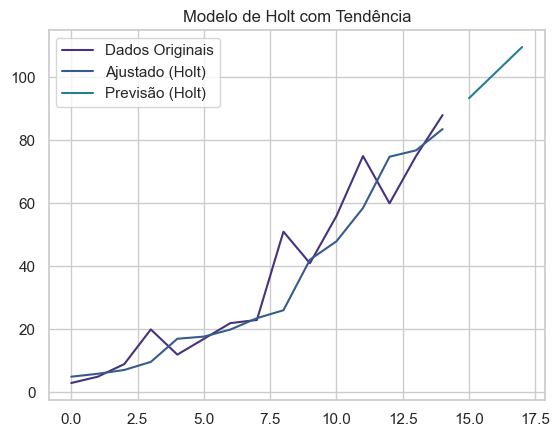

In [34]:
# In[86]: Visualização dos dados e previsões
plt.plot(base, label="Dados Originais")
plt.plot(holt_model.fittedvalues, label="Ajustado (Holt)")
plt.plot(np.arange(len(base), len(base) + 3), holt_forecast, label="Previsão (Holt)")
plt.title("Modelo de Holt com Tendência")
plt.legend()
plt.show()

# Modelo Holt-Winters com Tendência (Holt-Winters atribuindo a tendencia)

In [35]:
ajuste2 = HW(base, trend='add', seasonal=None).fit()
print(ajuste2.summary())

fitted_ajuste2 = ajuste2.fittedvalues
print("Valores ajustados (Holt-Winters com tendência):")
print(fitted_ajuste2)

# Previsão de 5 passos à frente
prevajuste2 = ajuste2.forecast(5)
print("Previsão para os próximos 5 períodos:")
print(prevajuste2)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   15
Model:             ExponentialSmoothing   SSE                            980.444
Optimized:                         True   AIC                             70.699
Trend:                         Additive   BIC                             73.532
Seasonal:                          None   AICC                            81.199
Seasonal Periods:                  None   Date:                 Tue, 05 Nov 2024
Box-Cox:                          False   Time:                         20:53:24
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.8218e-08                alpha                 True
smoothing_trend           7.8893e-

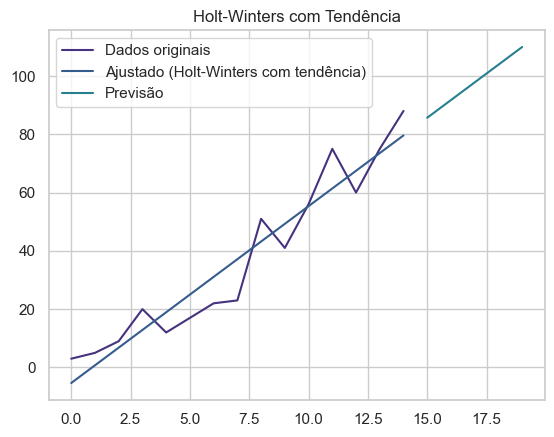

In [36]:
# In[88]: Visualização dos dados ajustados e previsão
plt.plot(base, label="Dados originais")
plt.plot(fitted_ajuste2, label="Ajustado (Holt-Winters com tendência)")
plt.plot(np.arange(len(base), len(base) + 5), prevajuste2, label="Previsão")
plt.title("Holt-Winters com Tendência")
plt.legend()
plt.show()

# Modelo de Holt-Winters com Tendência e Sazonalidade

O modelo de Holt-Winters é uma técnica de previsão de séries temporais que incorpora componentes de nível, tendência e sazonalidade. Esse modelo é uma extensão do modelo de suavização exponencial simples e é amplamente usado para dados que possuem uma estrutura de tendência (crescente ou decrescente ao longo do tempo) e sazonalidade (repetição de padrões em intervalos fixos, como vendas sazonais). Ele é chamado também de **modelo de suavização exponencial tripla**.

### Componentes do Modelo
O modelo de Holt-Winters com tendência e sazonalidade é composto por três elementos principais:

1. **Nível ($L_t$)**: Reflete o valor base da série, considerando a média dos dados recentes.
2. **Tendência ($T_t$)**: Captura a inclinação ou direção do crescimento ou decrescimento da série ao longo do tempo.
3. **Sazonalidade ($S_t$)**: Representa os padrões repetitivos ou flutuações sazonais, como variações ao longo do ano, mês ou semana.

### Equações do Modelo

Existem duas versões do modelo Holt-Winters para lidar com sazonalidade: **aditiva** e **multiplicativa**. A escolha entre elas depende de como a sazonalidade impacta os dados:
- **Modelo Aditivo**: Ideal para séries com variação sazonal constante.
- **Modelo Multiplicativo**: Adequado para séries onde a amplitude sazonal aumenta ou diminui com o nível da série.

Para uma série $Y_t$ com nível, tendência e sazonalidade, as equações do modelo multiplicativo são:

1. **Nível**: $L_t = \alpha \frac{Y_t}{S_{t - m}} + (1 - \alpha)(L_{t-1} + T_{t-1})$
2. **Tendência**: $T_t = \beta (L_t - L_{t-1}) + (1 - \beta) T_{t-1}$
3. **Sazonalidade**: $S_t = \gamma \frac{Y_t}{L_t} + (1 - \gamma) S_{t - m}$
4. **Previsão**: $\hat{Y}_{t+k} = (L_t + k T_t) S_{t+k - m}$

onde:
- $m$ é o número de períodos em um ciclo sazonal (ex.: 12 para dados mensais com sazonalidade anual),
- $\alpha$, $\beta$ e $\gamma$ são os parâmetros de suavização para o nível, tendência e sazonalidade, respectivamente, com valores entre 0 e 1.

### Como o Modelo Funciona
1. **Atualização dos parâmetros**: A cada novo ponto da série, o modelo atualiza o nível, a tendência e a sazonalidade usando os parâmetros de suavização. Valores de $\alpha$, $\beta$ e $\gamma$ próximos de 1 dão mais peso aos dados mais recentes.
2. **Previsão**: Com base nos valores atualizados, o modelo calcula a previsão para períodos futuros, levando em conta a tendência e a sazonalidade.

### Ajuste dos Parâmetros
Os valores de $\alpha$, $\beta$ e $\gamma$ podem ser ajustados com métodos de otimização, minimizando o erro da previsão (ex.: erro quadrático médio).

### Aplicações
O modelo de Holt-Winters é usado em diversas áreas, como previsão de demanda, análise financeira e planejamento de capacidade, especialmente em séries temporais com padrões sazonais claros.

Essa abordagem ajuda a capturar o comportamento geral da série (nível e tendência) e a variação periódica (sazonalidade), oferecendo previsões mais precisas para dados com essas características.

In [37]:
# Nova base de dados com sazonalidade
base2 = pd.Series([10, 14, 8, 25, 16, 22, 14, 35, 15, 27, 18, 40, 28, 40, 25, 65],
                  index=pd.date_range(start='2019-01-01', periods=16, freq='QE'))


def plot_holtwinters(model, fitted_values, forecast, model_type):
    plt.figure(figsize=(10, 6))

    # Obter datas para o período da previsão
    forecast_index = pd.date_range(start=base2.index[-1] + pd.offsets.QuarterEnd(), periods=len(forecast), freq='QE')

    # Plotando os dados originais, ajustados e previsão
    plt.plot(base2.index, base2, label="Dados Originais", marker='o', color='blue')
    plt.plot(base2.index, fitted_values, label="Valores Ajustados", marker='o', color='green')
    plt.plot(forecast_index, forecast, label="Previsão", marker='o', color='red')

    # Intervalo de confiança
    plt.fill_between(forecast_index, forecast * 0.95, forecast * 1.05, color='gray', alpha=0.2, label="Intervalo de Confiança 95%")

    plt.title(f"Modelo Holt-Winters ({model_type})", fontsize=14)
    plt.xlabel("Período", fontsize=12)
    plt.ylabel("Valores", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [38]:
base2

2019-03-31    10
2019-06-30    14
2019-09-30     8
2019-12-31    25
2020-03-31    16
2020-06-30    22
2020-09-30    14
2020-12-31    35
2021-03-31    15
2021-06-30    27
2021-09-30    18
2021-12-31    40
2022-03-31    28
2022-06-30    40
2022-09-30    25
2022-12-31    65
Freq: QE-DEC, dtype: int64

### Modelo Holt-Winters Aditivo

In [39]:
# In[90]: Modelo Holt-Winters Aditivo

ajuste4 = HW(base2, trend='add', seasonal='add', seasonal_periods=4).fit()
fitted_ajuste4 = ajuste4.fittedvalues
print(ajuste4.summary())

prevajuste4 = ajuste4.forecast(4)
print("Previsão para os próximos 4 períodos:")
print(prevajuste4)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   16
Model:             ExponentialSmoothing   SSE                            351.415
Optimized:                         True   AIC                             65.430
Trend:                         Additive   BIC                             71.611
Seasonal:                      Additive   AICC                           109.430
Seasonal Periods:                     4   Date:                 Tue, 05 Nov 2024
Box-Cox:                          False   Time:                         20:53:25
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4028303                alpha                 True
smoothing_trend          

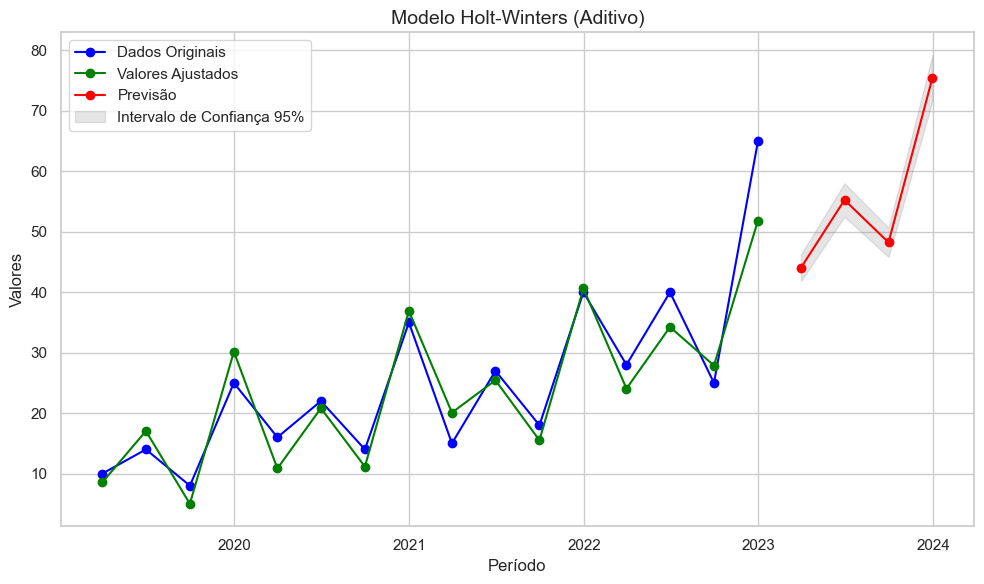

In [40]:
# In[91]: Gráfico do modelo aditivo
plot_holtwinters(ajuste4, fitted_ajuste4, prevajuste4, model_type="Aditivo")


### Modelo Holt-Winters Multiplicativo

In [41]:
# In[92]: Modelo Holt-Winters Multiplicativo
ajuste5 = HW(base2, trend='add', seasonal='mul', seasonal_periods=4).fit()
fitted_ajuste5 = ajuste5.fittedvalues
print(ajuste5.summary())

prevajuste5 = ajuste5.forecast(4)
prevajuste5

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   16
Model:             ExponentialSmoothing   SSE                             91.697
Optimized:                         True   AIC                             43.934
Trend:                         Additive   BIC                             50.115
Seasonal:                Multiplicative   AICC                            87.934
Seasonal Periods:                     4   Date:                 Tue, 05 Nov 2024
Box-Cox:                          False   Time:                         20:53:25
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4735679                alpha                 True
smoothing_trend          

2023-03-31    37.154288
2023-06-30    55.925437
2023-09-30    34.051749
2023-12-31    86.121283
Freq: QE-DEC, dtype: float64

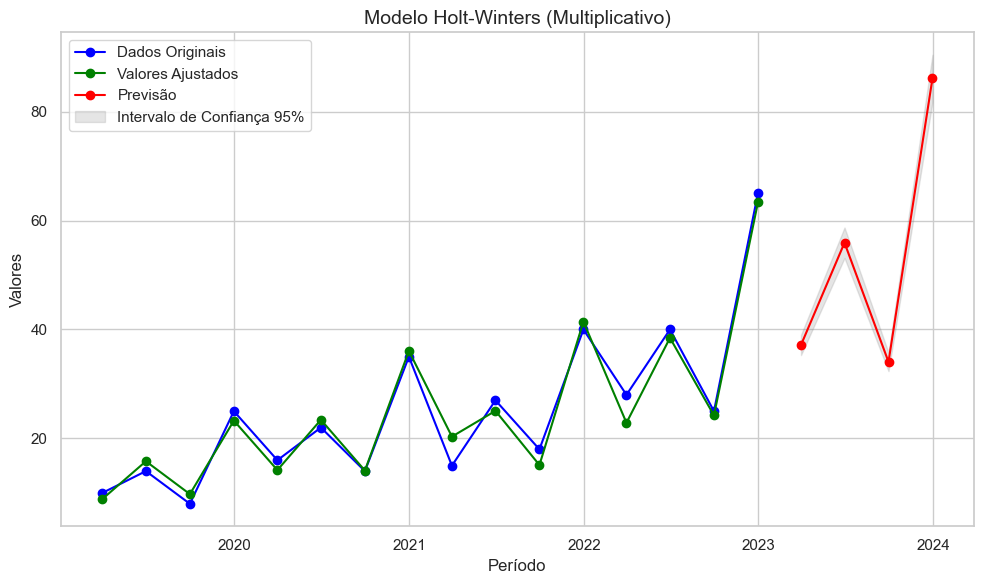

In [42]:
# In[93]: Gráfico do modelo multiplicativo
plot_holtwinters(ajuste5, fitted_ajuste5, prevajuste5, model_type="Multiplicativo")

### Modelos ARIMA - (Box - Jenkins)

Importando Bibliotecas

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

MODELOS ARIMA - Simulados

In [44]:
# Simulação de um modelo AR(1)
# Definir o coeficiente do modelo AR(1)
ar = np.array([1, -0.8])

# AR(1) com coeficiente +0.8 (note o sinal negativo para simulação)
# a biblioteca ArmaProcess espera que o sinal seja inverso
ma = np.array([1])  # Não há parte MA, então é apenas [1]

# Criar o processo AR(1)
ar_process = ArmaProcess(ar, ma)

# Simular 500 pontos para a série temporal
np.random.seed(42)  # Para reprodutibilidade
serie_ar = ar_process.generate_sample(nsample=500)

Plotar a série temporal simulada

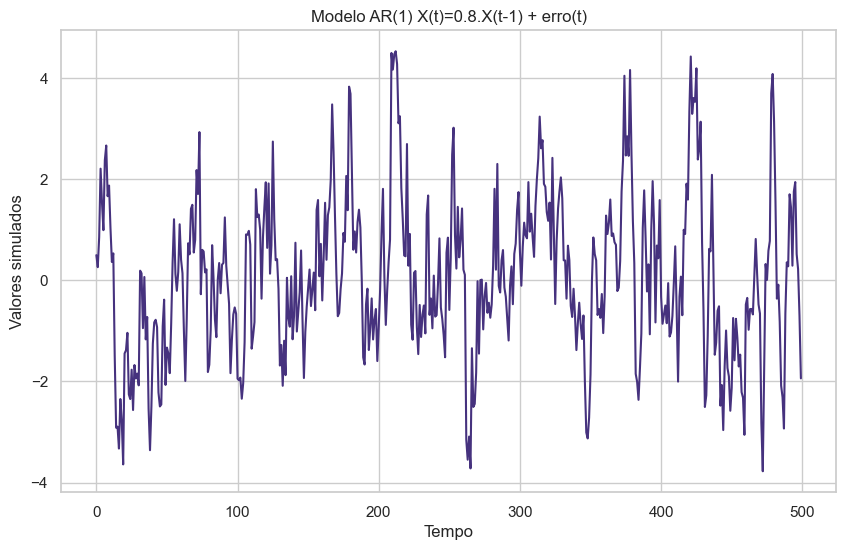

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(serie_ar)
plt.title('Modelo AR(1) X(t)=0.8.X(t-1) + erro(t)')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

Definir o coeficiente do modelo MA(1)

In [46]:
ma = np.array([1, -0.3])  # MA(1) com coeficiente -0.3
ar = np.array([1])  # Não há parte AR, então é apenas [1]

# Criar o processo MA(1)
ma_process = ArmaProcess(ar, ma)

# Simular 500 pontos para a série temporal
np.random.seed(42)  # Para reprodutibilidade
serie_ma = ma_process.generate_sample(nsample=500)

Plotar a série temporal simulada

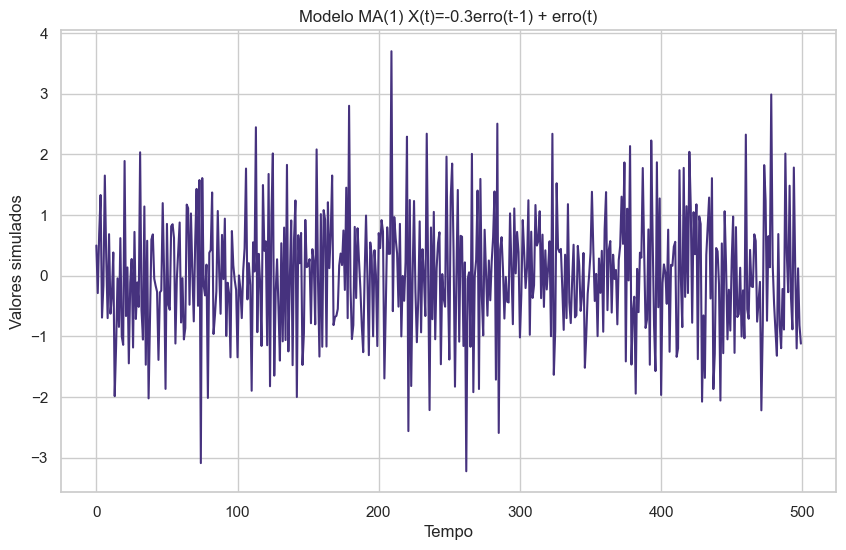

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(serie_ma)
plt.title('Modelo MA(1) X(t)=-0.3erro(t-1) + erro(t)')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

Simulação de um modelo ARMA(1,1)

In [48]:
# Definir os coeficientes do modelo ARMA(1,1)
ar = np.array([1, -0.8])  # AR(1) com coeficiente +0.8
ma = np.array([1, -0.3])  # MA(1) com coeficiente -0.3

# Criar o processo ARMA(1,1)
arma_process = ArmaProcess(ar, ma)

# Simular 500 pontos para a série temporal
np.random.seed(42)  # Para reprodutibilidade
serie_arma = arma_process.generate_sample(nsample=500)

Plotar a série temporal simulada

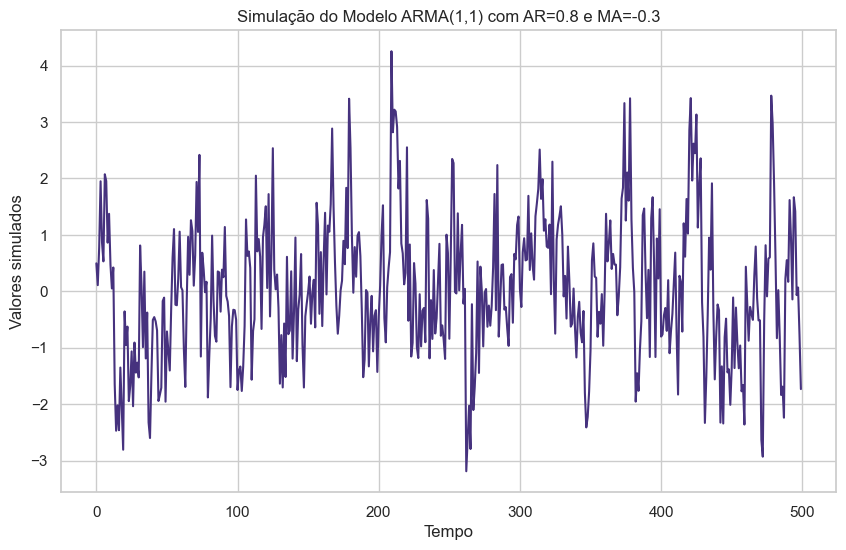

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(serie_arma)
plt.title('Simulação do Modelo ARMA(1,1) com AR=0.8 e MA=-0.3')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

Simulando um modelo ARIMA(1,1,1)

In [50]:
# from statsmodels.tsa.arima.model import ARIMA

# Definir o número de pontos para simulação
pontos = 500

# Definir os parâmetros ARIMA (1,1,1)
ar = np.array([1, -0.8])   
ma = np.array([1, -0.3])   
 
# Simular a série temporal ARIMA(1,1,1)
np.random.seed(42)  # Para reprodutibilidade
arma_process = ArmaProcess(ar, ma)
serie_arima = arma_process.generate_sample(nsample=pontos)

# Converter a série estacionária em uma série não estacionária aplicando a integração (d=1)
serie_arima_nao_estacionaria = np.cumsum(serie_arma)  # Diferenciação inversa (integração)

# Converter a série simulada em um DataFrame
serie_arima_nao_estacionaria = pd.Series(serie_arima_nao_estacionaria)

Visualizar a série simulada não estacionária

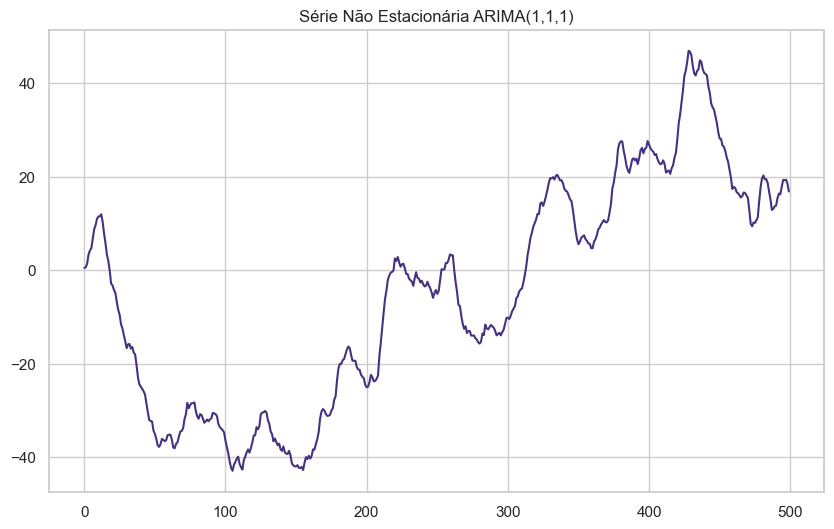

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(serie_arima_nao_estacionaria)
plt.title("Série Não Estacionária ARIMA(1,1,1)")
plt.grid(True)
plt.show() 

## Analisando as séries autoregressivas

Testes de Estacionariedade

In [52]:
# H0: A série Não é Estacionária
# H1: A série é Estacionária


# Teste de Dickey-Fuller aumentado (ADF)
def dickey_fuller_test(series, title=''):
    result = adfuller(series)
    print(f'Teste de Dickey-Fuller para {title}')
    print(f'Estatística: {result[0]}')
    print(f'p-valor: {result[1]}')
    print('Critérios:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    print('Conclusão:', 'Estacionária' if result[1] < 0.01 else 'Não Estacionária')
    print()

Aplicando o teste de Dickey-Fuller

In [53]:
dickey_fuller_test(serie_ar, 'AR(1)')

dickey_fuller_test(serie_ma, 'MA(1)')

dickey_fuller_test(serie_arma, 'ARMA(1,1)')

# ATENÇÃO: vamos rodar para a série ARIMA, tem o I = 1
dickey_fuller_test(serie_arima_nao_estacionaria, 'ARIMA(1,1,1)')

Teste de Dickey-Fuller para AR(1)
Estatística: -7.70347788965323
p-valor: 1.3203278877978295e-11
Critérios:
1%: -3.4435228622952065
5%: -2.867349510566146
10%: -2.569864247011056
Conclusão: Estacionária

Teste de Dickey-Fuller para MA(1)
Estatística: -13.204854961663719
p-valor: 1.0759953920047436e-24
Critérios:
1%: -3.4436029548776395
5%: -2.867384756137026
10%: -2.5698830308597813
Conclusão: Estacionária

Teste de Dickey-Fuller para ARMA(1,1)
Estatística: -8.369897265412863
p-valor: 2.6798220326645207e-13
Critérios:
1%: -3.4435494520411605
5%: -2.8673612117611267
10%: -2.5698704830567247
Conclusão: Estacionária

Teste de Dickey-Fuller para ARIMA(1,1,1)
Estatística: -1.2891348440074342
p-valor: 0.6341283601220165
Critérios:
1%: -3.4435761493506294
5%: -2.867372960189225
10%: -2.5698767442886696
Conclusão: Não Estacionária



### Estimação de um modelo ARIMA - Escolher, p, q e d

Funções ACF e PACF

In [55]:
def plot_acf_pacf(series, lags=20, title=''):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plot_acf(series, lags=lags, ax=ax[0], title=f'ACF {title}')
    plot_pacf(series, lags=lags, ax=ax[1], title=f'PACF {title}', method='ywm')
    plt.show()

Plotando ACF e PACF das séries

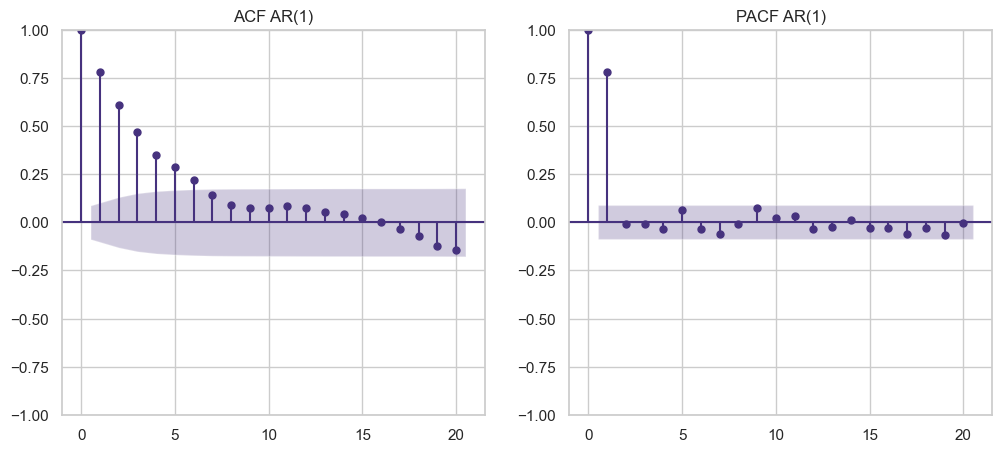

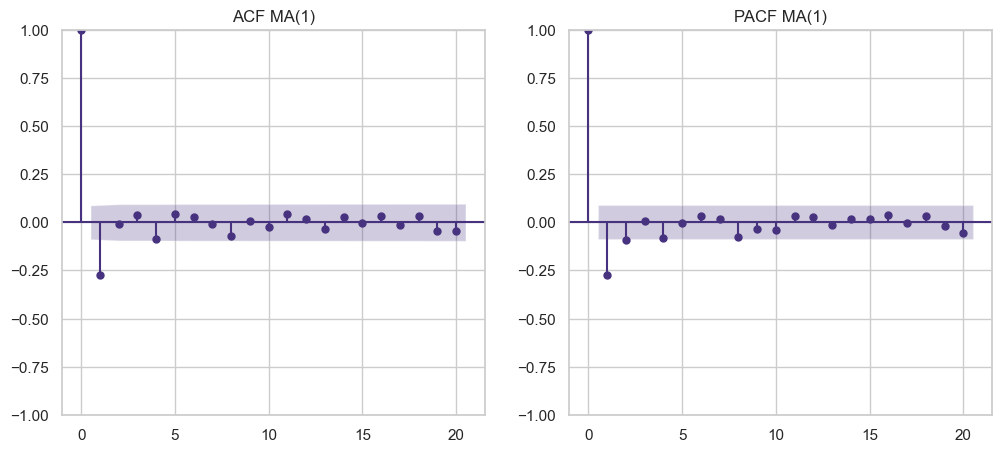

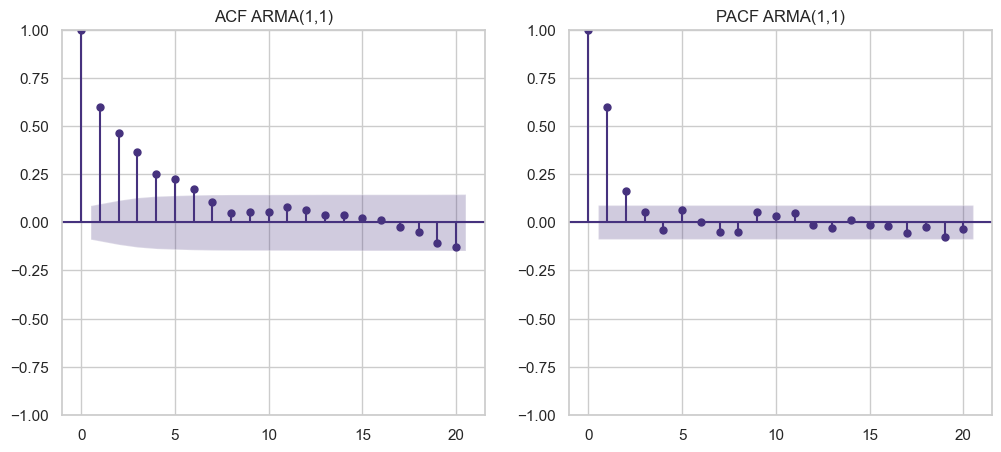

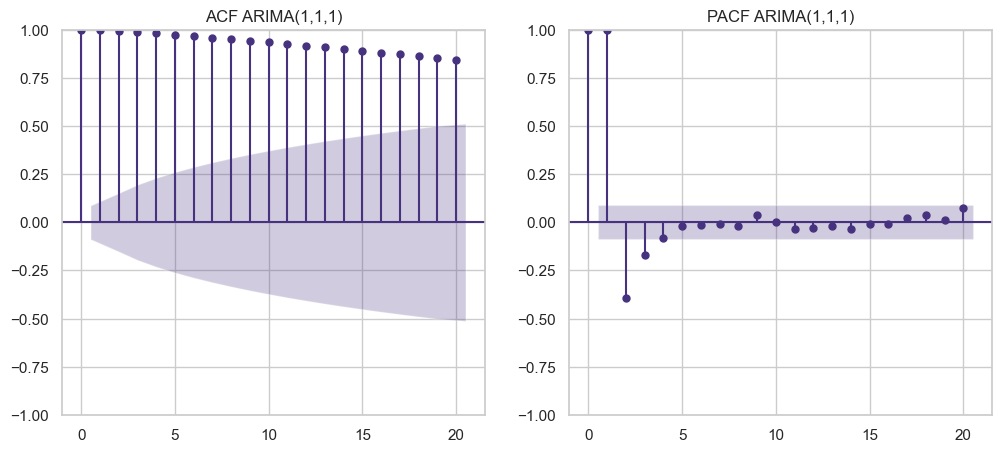

In [56]:
plot_acf_pacf(serie_ar, title='AR(1)')

plot_acf_pacf(serie_ma, title='MA(1)')

plot_acf_pacf(serie_arma, title='ARMA(1,1)')

plot_acf_pacf(serie_arima_nao_estacionaria, title='ARIMA(1,1,1)')


### Estimando o modelo ARIMA usando auto-arima

Instalação da Biblioteca

In [57]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/614.7 kB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/614.7 kB 2.0 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 2.3 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/614.7 kB 2.7 MB/s eta 0:00:01
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


Carrega a Biblioteca

In [58]:
from pmdarima import auto_arima

### Estimar automaticamente o modelo ARIMA

Lembrando: simulamos um AR(1) de coeficiente 0.8

In [75]:
# Lembrando: simulamos um AR(1) de coeficiente 0.8
auto_arima_model = auto_arima(serie_ar, trace=True, seasonal=False, stepwise=True)
print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1408.336, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1877.801, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1403.556, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1583.161, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1405.472, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1405.474, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1407.350, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1405.519, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.560 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -699.778
Date:                Tue, 05 Nov 2024   AIC                           1403.556
Time:                        22:10:1

Lembrando: simulamos um MA(1) de coeficiente -0.3



In [76]:
auto_arima_model_ma = auto_arima(serie_ma, trace=True, seasonal=False, stepwise=True)
print(auto_arima_model_ma.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1407.554, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1445.047, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1407.556, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1403.085, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1405.044, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1405.045, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1405.883, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1405.063, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.618 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -699.542
Date:                Tue, 05 Nov 2024   AIC                           1403.085
Time:                        22:10:3


Lembrando: simulamos um ARMA(1,1) de coeficiente AR = 0.8 e MA= -0.3


In [77]:
auto_arima_model_arma = auto_arima(serie_arma, trace=True, seasonal=False, stepwise=True)
print(auto_arima_model_arma.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1408.012, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1638.759, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1417.634, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1495.703, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1406.963, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1453.850, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1405.018, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1406.973, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1405.934, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1406.978, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.708 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(1, 0, 1)   Log Likelihood        


Lembrando: simulamos um ARIMA(1,1,1) de coeficiente AR = 0.8 e MA= -0.3

In [78]:
auto_arima_model_arima = auto_arima(serie_arima_nao_estacionaria, trace=True, seasonal=False, stepwise=True)

print(auto_arima_model_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1408.127, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1637.981, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1417.558, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1495.333, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1636.326, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1407.060, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1453.370, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1405.119, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1407.070, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1405.992, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1403.155, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1493.535, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1415.620, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1405.107, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]          

Função para identificar quantas diferenciações são necessárias 

In [60]:
def simular_arima(n, ar=[1, -0.8], ma=[1, -0.3], d=1, noise_std=5):
    """Simula uma série ARIMA com tendência, maior variabilidade e componente não sazonal."""
    
    # Criar a parte ARMA (ARIMA sem diferenciação)
    ar_params = np.r_[1, -np.array(ar[1:])]  # Parâmetro AR ajustado para ARMAProcess
    ma_params = np.r_[1, np.array(ma[1:])]   # Parâmetro MA ajustado para ARMAProcess
    arma_process = ArmaProcess(ar_params, ma_params)
    serie_arma = arma_process.generate_sample(nsample=n)
    
    # Adicionar um componente de tendência (para garantir que a série seja não estacionária)
    tendencia = np.linspace(0, n * 0.05, n)  # Componente de tendência linear
    
    # Adicionar variabilidade adicional
    variabilidade_adicional = np.random.normal(loc=0, scale=noise_std, size=n)  # Variabilidade adicional
    
    # Adicionar a tendência, variabilidade e aplicar a diferenciação (d=1)
    serie_arima = np.cumsum(serie_arma + tendencia + variabilidade_adicional)  # Diferenciação inversa (integração)
    
    return pd.Series(serie_arima)

Simular a série ARIMA(1,1,1) com tendência e variabilidade aumentada

In [61]:
np.random.seed(42)
serie_arima = simular_arima(500, ar=[1, -0.8], ma=[1, -0.3], d=1, noise_std=5)

Visualizar a série simulada ARIMA(1,1,1)

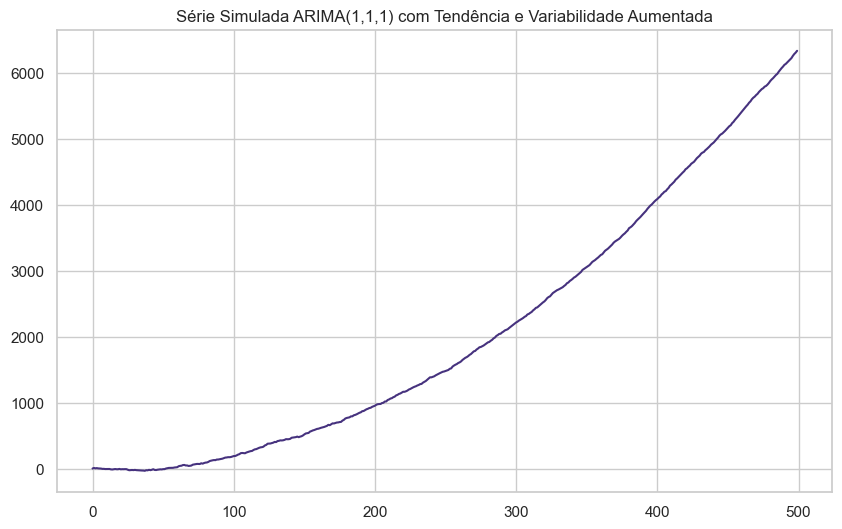

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(serie_arima)
plt.title("Série Simulada ARIMA(1,1,1) com Tendência e Variabilidade Aumentada")
plt.grid(True)
plt.show()

Função para verificar quantas diferenciações são necessárias para tornar a série estacionária

In [82]:
import pmdarima as pm
def verificar_differenciacao(serie, nome):
    # Usar a função ndiffs do pmdarima
    d = pm.arima.ndiffs(serie, test='adf')  # Teste de Dickey-Fuller aumentado
    print(f"A série {nome} precisa de {d} diferenciação(ões) para ser estacionária.")
    return d


Verificar quantas diferenciações são necessárias

In [83]:
verificar_differenciacao(serie_arima, "ARIMA(1,1,1)")

A série ARIMA(1,1,1) precisa de 1 diferenciação(ões) para ser estacionária.


1

Verificar quantas diferenciações são necessárias

In [84]:
verificar_differenciacao(serie_ar, "AR(1)")
verificar_differenciacao(serie_ma, "MA(1)")
verificar_differenciacao(serie_arma, "ARMA(1,1)")

A série AR(1) precisa de 0 diferenciação(ões) para ser estacionária.
A série MA(1) precisa de 0 diferenciação(ões) para ser estacionária.
A série ARMA(1,1) precisa de 0 diferenciação(ões) para ser estacionária.


0

Simulação de séries AR de ordens maiores

In [85]:
# Função para simular séries AR, MA e ARIMA
def simular_arima(ar=None, ma=None, n=500, d=1, seed=42):
    np.random.seed(seed)
    ar = np.array([1] + [-coef for coef in (ar if ar else [])])  # Definir AR
    ma = np.array([1] + [coef for coef in (ma if ma else [])])  # Definir MA
    process = ArmaProcess(ar, ma)
    return process.generate_sample(nsample=n)

simulando outras series de ordem superior

In [86]:
serie_ar2 = simular_arima(ar=[0.8, 0.1], n=500)

Plotar a série simulada AR(2)

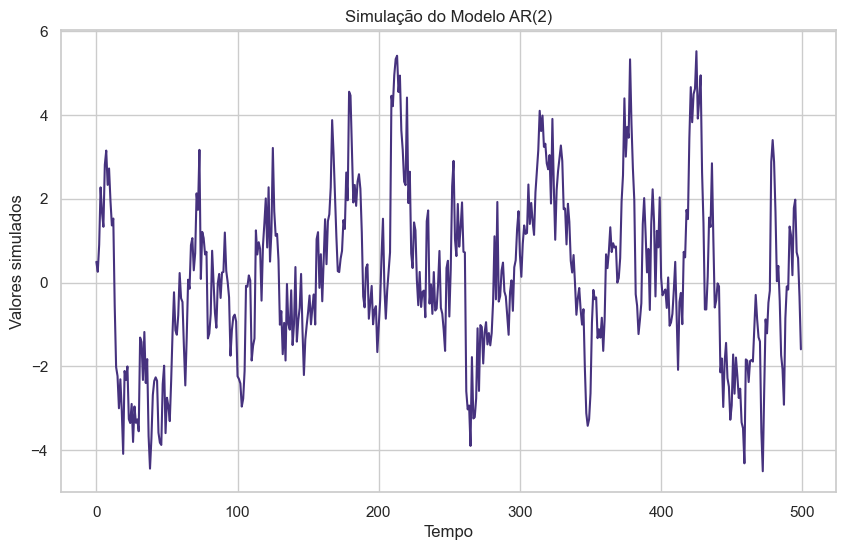

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(serie_ar2)
plt.title('Simulação do Modelo AR(2)')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

Simulando agora um AR(3)

In [67]:
serie_ar3 = simular_arima(ar=[0.5, 0.1, 0.3], n=500)

Plotar a série simulada AR(3)

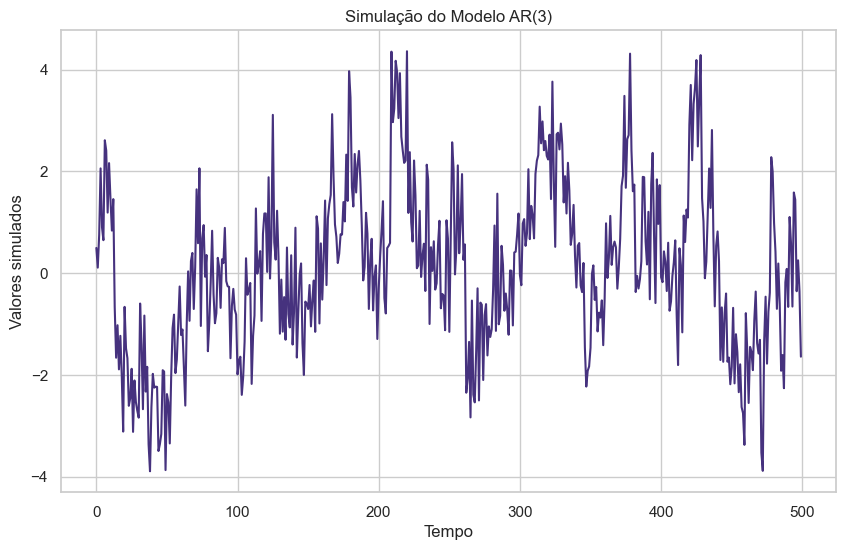

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(serie_ar3)
plt.title('Simulação do Modelo AR(3)')
plt.xlabel('Tempo')
plt.ylabel('Valores simulados')
plt.grid(True)
plt.show()

Teste Dickey-Fuller (ADF) para estacionariedade

In [69]:
def teste_dickey_fuller(serie, nome):
    resultado = adfuller(serie)
    print(f"\nTeste Dickey-Fuller para {nome}:")
    print(f"Estatística: {resultado[0]}")
    print(f"P-valor: {resultado[1]}")
    for key, value in resultado[4].items():
        print(f"{key}: {value}")
    print('Conclusão:', 'Estacionária' if resultado[1] < 0.01 else 'Não Estacionária')

Verificar a estacionariedade das séries simuladas

In [70]:
teste_dickey_fuller(serie_ar2, "AR(2)")

teste_dickey_fuller(serie_ar3, "AR(3)")



Teste Dickey-Fuller para AR(2):
Estatística: -5.177924265056013
P-valor: 9.751842807262662e-06
1%: -3.4435494520411605
5%: -2.8673612117611267
10%: -2.5698704830567247
Conclusão: Estacionária

Teste Dickey-Fuller para AR(3):
Estatística: -4.206940471346254
P-valor: 0.0006413006928831808
1%: -3.4435761493506294
5%: -2.867372960189225
10%: -2.5698767442886696
Conclusão: Estacionária


Plotando ACF e PACF para as séries simuladas

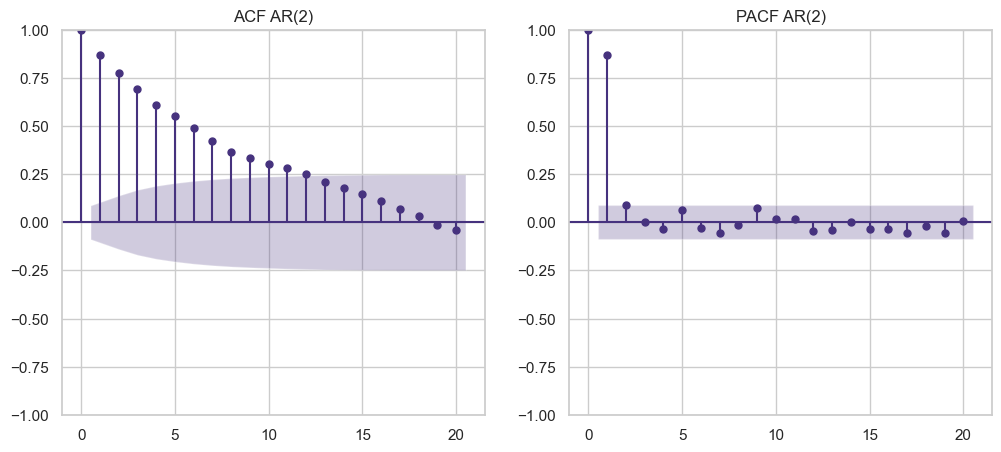

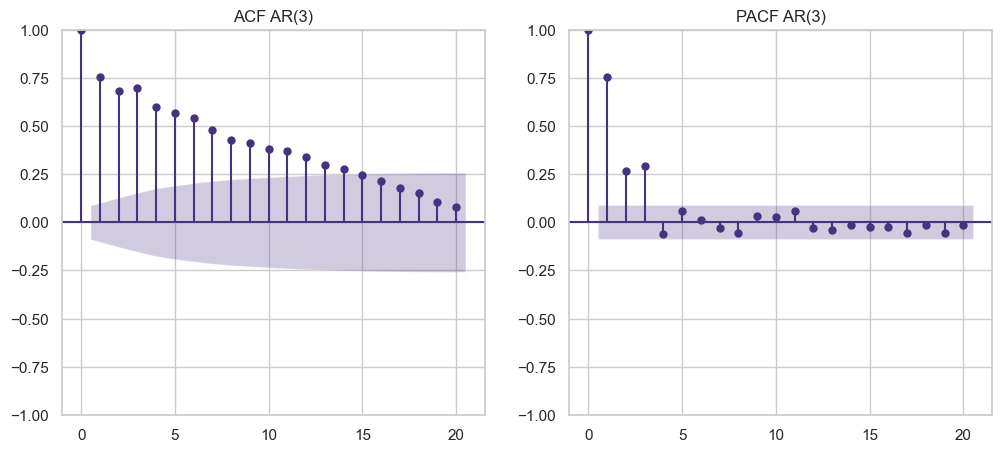

In [71]:
plot_acf_pacf(serie_ar2, title='AR(2)')

plot_acf_pacf(serie_ar3, title='AR(3)')


Identificar modelos ARIMA diretamente

In [87]:
# Estimar ARIMA manualmente com ordem (2,0,0) para série 2 e (3,0,0) para série 3
modelo_ar2 = ARIMA(serie_ar2, order=(2, 0, 0)).fit()
print(f'\nModelo ARIMA(2,0,0) ajustado para serie2:\n{modelo_ar2.summary()}')




Modelo ARIMA(2,0,0) ajustado para serie2:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -699.788
Date:                Tue, 05 Nov 2024   AIC                           1407.577
Time:                        22:18:50   BIC                           1424.435
Sample:                             0   HQIC                          1414.192
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0790      0.368      0.214      0.830      -0.643       0.801
ar.L1          0.7929      0.046     17.092      0.000       0.702       0.884
ar.L2    

In [88]:
modelo_ar3 = ARIMA(serie_ar3, order=(3, 0, 0)).fit()
print(f'\nModelo ARIMA(3,0,0) ajustado para serie3:\n{modelo_ar3.summary()}')


Modelo ARIMA(3,0,0) ajustado para serie3:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -699.538
Date:                Tue, 05 Nov 2024   AIC                           1409.077
Time:                        22:18:56   BIC                           1430.150
Sample:                             0   HQIC                          1417.346
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0829      0.341      0.243      0.808      -0.586       0.752
ar.L1          0.4751      0.045     10.451      0.000       0.386       0.564
ar.L2    

Simular séries AR(3) com diferentes coeficientes positivos e negativos

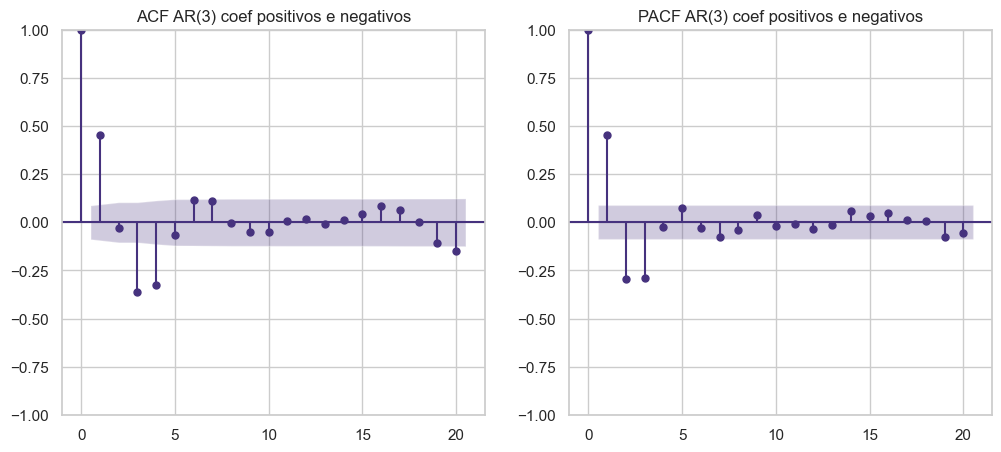


Modelo ARIMA(3,0,0) ajustado para AR(3) com coef positivos e negativos:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -699.644
Date:                Tue, 05 Nov 2024   AIC                           1409.287
Time:                        21:58:13   BIC                           1430.360
Sample:                             0   HQIC                          1417.556
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.048      0.150      0.881      -0.088       0.102
ar.L1          0.5017      0.043     11.551      0.000    

In [73]:
# AR(3) com coeficientes [0.5, -0.1, -0.3]
serie_ar31 = simular_arima(ar=[0.5, -0.1, -0.3], n=500)

# Plot ACF e PACF para serie2 (AR(3) com coeficientes [0.5, 0.1, 0.3])
plot_acf_pacf(serie_ar31, title='AR(3) coef positivos e negativos')

modelo_ar31 = ARIMA(serie_ar31, order=(3, 0, 0)).fit()
print(f'\nModelo ARIMA(3,0,0) ajustado para AR(3) com coef positivos e negativos:\n{modelo_ar31.summary()}')


 Simular uma série ARMA(2,2)


Teste Dickey-Fuller para ARMA(2,2) coef positivos e negativos:
Estatística: -6.366309889714129
P-valor: 2.4051044235533355e-08
1%: -3.4437386290417082
5%: -2.867444458865948
10%: -2.5699148492415413
Conclusão: Estacionária


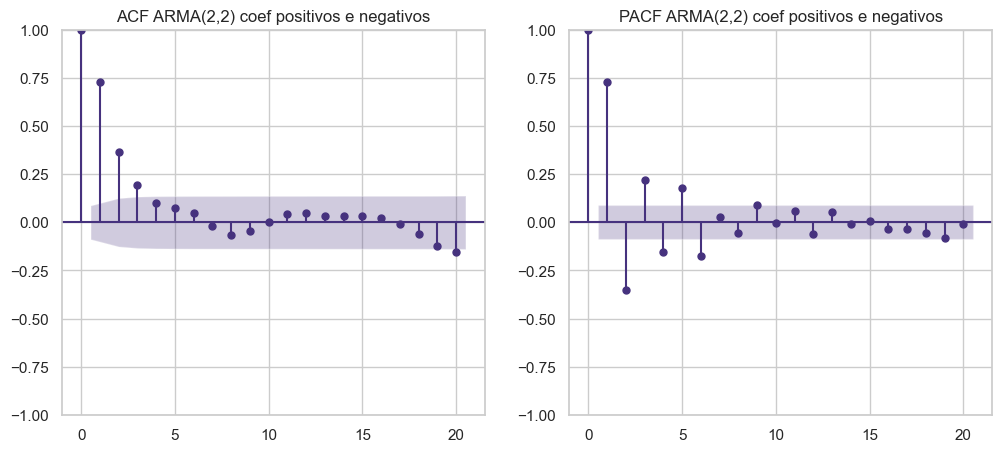

In [74]:
serie_arma221 = simular_arima(ar=[0.8, -0.1], ma=[0.4, -0.3], n=500)

# Testar a estacionariedade de série ARMA(2,2)
teste_dickey_fuller(serie_arma221, "ARMA(2,2) coef positivos e negativos")

# Plotar ACF e PACF para série ARMA(2,2)
plot_acf_pacf(serie_arma221, title='ARMA(2,2) coef positivos e negativos')

### Caso encontre ARIMA(0,0,0) - não foi possível encontrar memória
## autoregressiva significativa